<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://www.paho.org/sites/default/files/styles/flexslider_full/public/banner-covid-19-1280x549.jpg?h=0f7a3278&itok=nrTaMkjD)"><b><span style='color:white'> Covid-19 Forecasting </span></b> </div>

<p style="background-color:#20B2AA;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:center;border-radius:10px;padding:10px;border:2px solid #FFFFFF;"> 🔄 CRISP-DM 🤖 </p>

<a id='1'></a>

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:80%;text-align:center;border-radius:10px; border: 2px solid #FFA500; padding: 10px;"><b>1|</b> 📚 BUSINESS UNDERSTANDING 📚</p>

**Background**

The COVID-19 pandemic has brought unprecedented challenges to Malaysia,
affecting the healthcare system, economy, and society at large. The vast amounts of data generated during the pandemic provide an opportunity to analyze the factors influencing case severity, vaccination effectiveness, and fatality rates. Understanding these factors is crucial for designing targeted health interventions and enabling informed policymaking. Despite significant vaccination efforts, questions remain about their effectiveness in reducing case severity and mortality rates. This project adopts a data-driven approach to uncover critical insights, optimize healthcare resource allocation, and improve future pandemic response readiness.


**Key Stakeholders**
*  **Primary:** Ministry of Health Malaysia (KKM)
*  **Secondary:** Healthcare providers, policymakers, and public health researchers

**Research Questions**
1.   What factors significantly influence COVID-19 outcomes in Malaysia?
2.   Which demographics and regions are most vulnerable?
3.   How do vaccination rates impact case severity and recovery rates?

**Business Objectives**
1. Build predictive models to identify critical factors influencing COVID-19 outcomes.
2. Guide targeted health interventions and resource allocation.
3. Evaluate vaccination impacts on reducing case severity.

**Success Criteria**
1. Provide actionable insights for equitable healthcare resource distribution.
2. Deliver predictive tools for effective pandemic management.


<a id='1'></a>

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:80%;text-align:center;border-radius:10px; border: 2px solid #FFA500; padding: 10px;"><b>2|</b> 📊 DATA UNDERSTANDING 📈</p>

### `About Dataset` - Datasets taken from data.gov.my
1. Daily COVID-19 Cases by Age Group & State: https://data.gov.my/data-catalogue/covid_cases_age
2. Daily COVID-19 Imported, Recovered, Active, and Cluster cases by State: https://data.gov.my/data-catalogue/covid_cases
3. Daily COVID-19 Cases by Vaccination Status & State:https://data.gov.my/data-catalogue/covid_cases_vaxstatus
4. Daily COVID-19 Vaccine Registrations by State:https://data.gov.my/data-catalogue/vaxreg_covid
5. Transactional Records: Deaths due to COVID-19: https://data.gov.my/data-catalogue/covid_deaths_linelist

### <b>I <span style='color:#85BB65'>|</span> IMPORTING LIBRARIES </b>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import logging
import pandas as pd
from io import BytesIO

### <b>II <span style='color:#85BB65'>|</span> LOADING DATASET </b>

onedrive link: https://1drv.ms/f/c/c3d50f9e04228195/Etl9RacoCr1Ng0miKVQNvu8BJMWxhT02haB-k0zzqH2xhA?e=8iax5d

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Google Drive Path
file_path = '/content/drive/My Drive/Sem1/WQD7003 Data Analytics/Group Project/Dataset/'

# read Daily COVID-19 Cases by Age Group & State
df_age_state = pd.read_csv(file_path+'covid_cases_age.csv')
# read Daily COVID-19 Cases by State (breakdown by Imported, Recovered, Active, and Cluster)
df_cases_breakdown = pd.read_csv(file_path+'covid_cases.csv')
# read Daily COVID-19 Cases by Vaccination Status & State
df_covid_vaccine = pd.read_csv(file_path+'covid_cases_vaxstatus.csv')
# read Daily COVID-19 Vaccine Registrations by State
df_vaccine_registration = pd.read_csv(file_path+'vaxreg_covid.csv')
# read Daily Death Rate
df_death = pd.read_csv(file_path+'covid_deaths_linelist.csv')

<a id='data_cleaning'></a>
# <p style="background-color:#FF6347;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:10px;padding:10px;"><b> 3|</b> 🧹 Data Preprocessing and Exploratory Data Analysis 🛁 </p>

<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:90%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 1. Cases by Age Group and State  </b></p>
</div>

### <b>I <span style='color:#85BB65'>|</span> Data Transformation - Pivot the age group column</b>

In [8]:
df_age_state.head()

,date,state,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Malaysia,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2020-01-26,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,Malaysia,1,0,2,0,1,0,0,0,1,0,1,0,0,0


In [9]:
df_age_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30481 entries, 0 to 30480
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              30481 non-null  object
 1   state             30481 non-null  object
 2   cases_child       30481 non-null  int64 
 3   cases_adolescent  30481 non-null  int64 
 4   cases_adult       30481 non-null  int64 
 5   cases_elderly     30481 non-null  int64 
 6   cases_0_4         30481 non-null  int64 
 7   cases_5_11        30481 non-null  int64 
 8   cases_12_17       30481 non-null  int64 
 9   cases_18_29       30481 non-null  int64 
 10  cases_30_39       30481 non-null  int64 
 11  cases_40_49       30481 non-null  int64 
 12  cases_50_59       30481 non-null  int64 
 13  cases_60_69       30481 non-null  int64 
 14  cases_70_79       30481 non-null  int64 
 15  cases_80          30481 non-null  int64 
dtypes: int64(14), object(2)
memory usage: 3.7+ MB


In [10]:
# to make sure the reported value is correct, remove state = 'Malaysia' as it is equal to sum of all states
df_age_state = df_age_state[df_age_state['state']!='Malaysia']

In [11]:
# Pivot the age group columns using melt
age_df = pd.melt(
    df_age_state ,
    id_vars=['date', 'state'],
    value_vars=['cases_0_4', 'cases_5_11', 'cases_12_17',
                'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59',
                'cases_60_69', 'cases_70_79', 'cases_80'],
    var_name='case_age_group',
    value_name='case_count'
)

In [12]:
# Cleaning the age-group columns
age_df['age_group'] = age_df['case_age_group'].str.replace('cases_', '').str.replace('_', '-')

In [13]:
# Drop case_age_group
age_df.drop(columns='case_age_group', inplace = True)

### <b>II <span style='color:#85BB65'>|</span> EDA - Basic Data Overview</b>

In [14]:
age_df.head()

,date,state,case_count,age_group
0,2020-01-25,Johor,0,0-4
1,2020-01-26,Johor,0,0-4
2,2020-01-27,Johor,0,0-4
3,2020-01-28,Johor,0,0-4
4,2020-01-29,Johor,0,0-4


In [15]:
# Check the shape of the dataset
print(f"Shape of df_age_state: {age_df.shape}")

Shape of df_age_state: (286880, 4)


In [16]:
# Check data types and missing values
print("Data types and missing values in age_df:")
print(age_df.info())

Data types and missing values in age_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286880 entries, 0 to 286879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        286880 non-null  object
 1   state       286880 non-null  object
 2   case_count  286880 non-null  int64 
 3   age_group   286880 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.8+ MB
None


In [17]:
# Basic statistics for numerical columns
print("Basic statistics for age_df:")
df_age_state.describe()

Basic statistics for age_df:


,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
count,28688.00000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000,28688.000000
mean,22.60290,11.529664,130.905884,17.749791,9.166167,13.436733,11.529664,48.083589,41.654315,24.851053,16.316927,10.435269,4.789808,2.524644
std,76.07301,37.551721,421.300676,46.611048,30.815059,45.782237,37.551721,156.731739,135.796433,80.880104,50.486054,29.919336,12.501521,5.390637
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.00000,1.000000,11.000000,2.000000,0.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,9.00000,5.000000,81.000000,14.000000,4.000000,5.000000,5.000000,27.000000,26.000000,16.000000,10.000000,7.000000,4.000000,3.000000
max,1506.00000,647.000000,8876.000000,863.000000,593.000000,913.000000,647.000000,3132.000000,2911.000000,1762.000000,1071.000000,571.000000,233.000000,82.000000


### <b>III <span style='color:#85BB65'>|</span> EDA - Univariate Analysis</b>

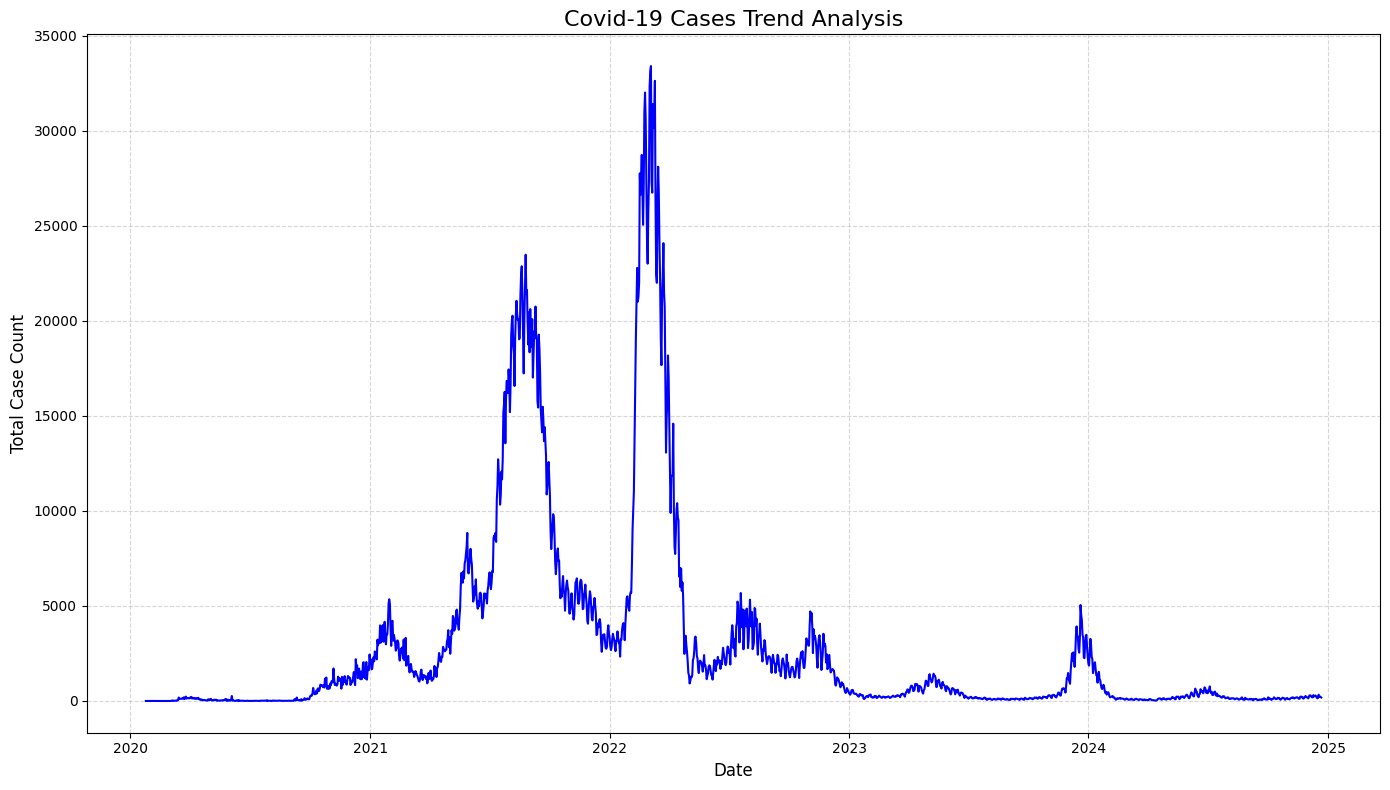

In [18]:
# Convert date column to datetime format
age_df['date'] = pd.to_datetime(age_df['date'])

# Aggregate case count by date
datewise_cases = age_df.groupby('date')['case_count'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(14, 8))
sns.lineplot(data=datewise_cases, x='date', y='case_count', color='blue')

# Customize the plot
plt.title("Covid-19 Cases Trend Analysis", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Case Count", fontsize=12)
plt.xticks()
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()


**Observation**<br />
We see two major peaks: one in August 2021 and another in March 2022.

### <b>IV <span style='color:#85BB65'>|</span> EDA - Bivariate Analysis</b>

<ipython-input-19-8c0ae27f8e76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_sum, x='age_group', y='case_count', palette='Set2')


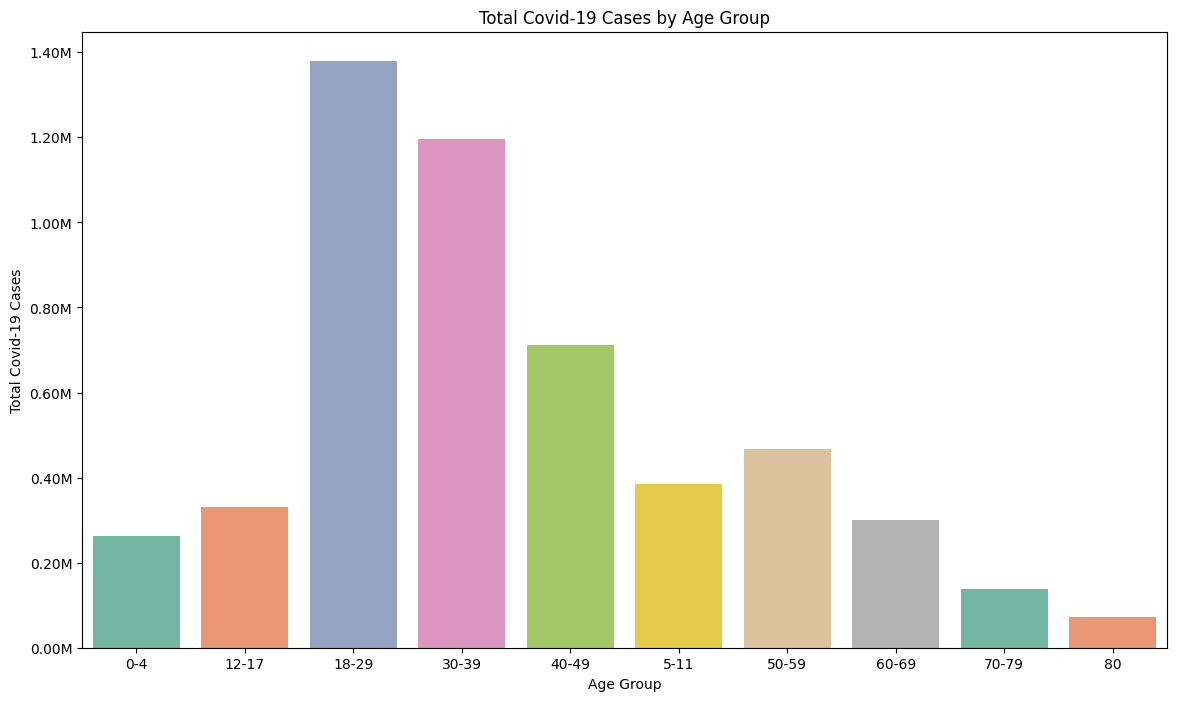

In [19]:
import matplotlib.ticker as mtick

# Aggregate the case count by age_group (sum the cases)
age_group_sum = age_df.groupby('age_group')['case_count'].sum().reset_index()

# Plot total cases by age group across all dates and states
plt.figure(figsize=(14, 8))
sns.barplot(data=age_group_sum, x='age_group', y='case_count', palette='Set2')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.2f}M'))
plt.title("Total Covid-19 Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Covid-19 Cases")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

**Which Groups are More Vulnerable to Covid-19?** <br/>
Looking at the plot, it’s clear that the 18–29 age group recorded the highest total cases.

<ipython-input-20-e87a3218ab70>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sum, y='state', x='case_count', palette=sns.color_palette("coolwarm", len(state_sum)), orient='h')


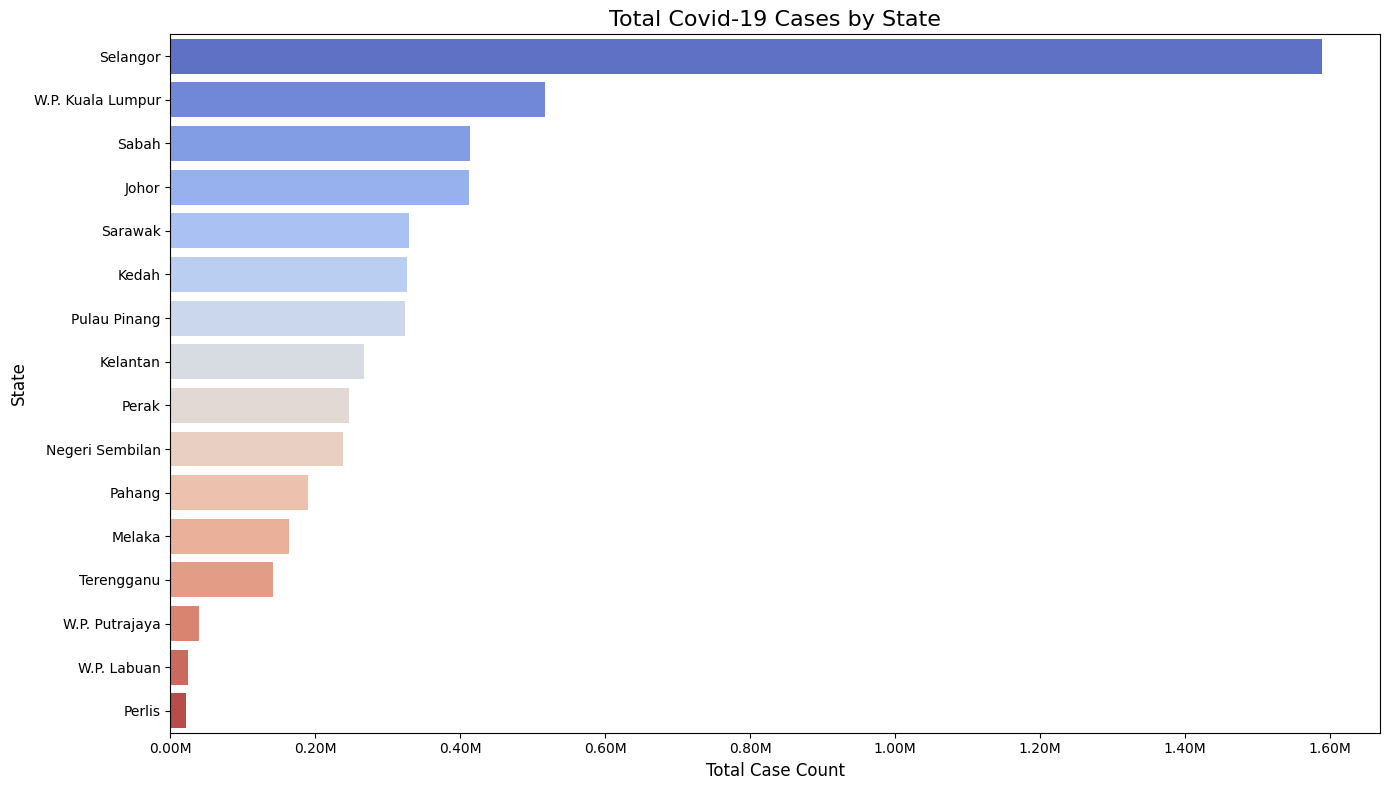

In [20]:
# Aggregate the case count by state (sum the cases) and sort by case_count
state_sum = age_df.groupby('state')['case_count'].sum().reset_index()
state_sum = state_sum.sort_values(by='case_count', ascending=False)

# Plot total cases by state in descending order
plt.figure(figsize=(14, 8))
sns.barplot(data=state_sum, y='state', x='case_count', palette=sns.color_palette("coolwarm", len(state_sum)), orient='h')

# Format y-axis to show case count in millions
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.2f}M'))

# Customize the plot
plt.title("Total Covid-19 Cases by State", fontsize=16)
plt.xlabel("Total Case Count", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

**Observation**: <br/>
From the total cases by state, Selangor stands out as the top contributor, followed by KL. Sabah and Johor

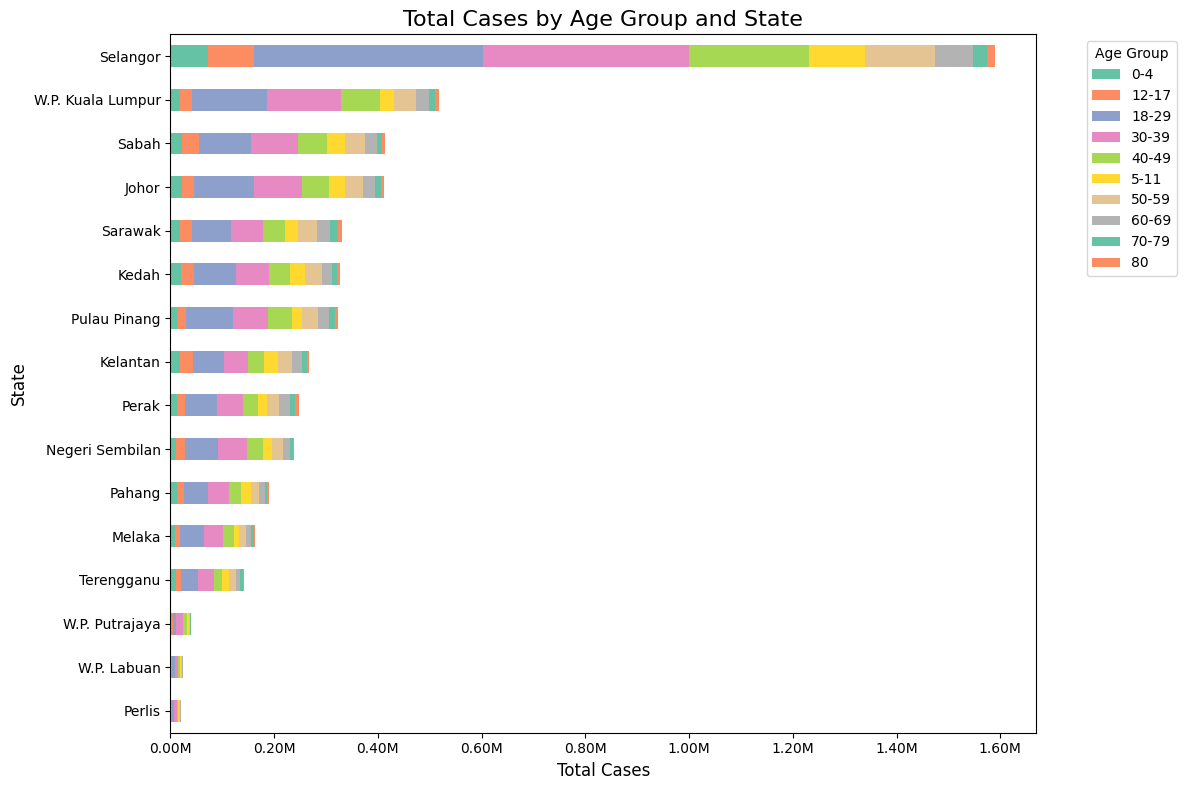

In [21]:
# Pivot the data to get state-wise total cases for each age group
pivoted_state_age = age_df.pivot_table(
    index='age_group',
    columns='state',
    values='case_count',
    aggfunc='sum',
    fill_value=0
)

# Calculate total case count by state
state_totals = pivoted_state_age.sum(axis=0).sort_values(ascending=True)

# Sort the pivoted table by state totals
sorted_pivot = pivoted_state_age[state_totals.index]

# Plot stacked horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
sorted_pivot.T.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=sns.color_palette('Set2', n_colors=len(sorted_pivot.index))  # Maintain 'Set2' for age group colors
)

# Formatting x-axis to display in millions
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.2f}M'))

# Customize the plot
ax.set_title("Total Cases by Age Group and State", fontsize=16)
ax.set_xlabel("Total Cases", fontsize=12)
ax.set_ylabel("State", fontsize=12)
ax.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()

# Display the plot
plt.show()

**Observation**: <br/>
Cases appear evenly distributed across states for each group, showing no strong link between age and location

### <b>V <span style='color:#85BB65'>|</span> EDA - Hypothesis Testing</b>

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:80%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 70%; letter-spacing: 1px; margin: 0; width: 1000%;"><b> Does age group have a significant effect on the number of covid cases? </b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:70%">
    <li>Null Hypothesis (H₀): There is no significant difference in terms of covid-19 cases among various age groups</li>
    <li>Alternative Hypothesis (H₁): There is a significant difference in terms of covid-19 cases among various age groups.</li>
  </ul>

##### <b>I <span style='color:#85BB65'>|</span> One-Way ANOVA</b>

In [22]:
import scipy.stats as stats

# Group by age_group and calculate the total case count for each group
age_group_cases = age_df.groupby('age_group')['case_count'].sum()

# Perform ANOVA to test if case_count differs significantly between age groups
f_statistic, p_value = stats.f_oneway(
    *[age_df[age_df['age_group'] == age]['case_count'] for age in age_df['age_group'].unique()]
)

# Print the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

# Interpret the result
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis: Age group affects case rate.")
else:
    print("Fail to reject the null hypothesis: Age group does not affect case rate.")


ANOVA F-statistic: 1175.5777239666118
ANOVA p-value: 0.0
Reject the null hypothesis: Age group affects case rate.


Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis. This means that **there is a statistically significant difference in the case rates among the different age groups**

Since ANOVA only tells us that there is a difference, but not between which specific age groups the differences exist, we conduct a post-hoc test (Tukey's HSD) to identify which age groups differ from each other.

##### <b>II <span style='color:#85BB65'>|</span> Tukey's Honest Significant Difference (HSD)</b>

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform an OLS (Ordinary Least Squares) regression model for the age group effect
model = ols('case_count ~ age_group', data=age_df).fit()

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(age_df['case_count'], age_df['age_group'])

# Print the results
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0-4,12-17,2.3635,0.0074,0.3581,4.3688,True
0-4,18-29,38.9174,0.0,36.9121,40.9228,True
0-4,30-39,32.4881,0.0,30.4828,34.4935,True
0-4,40-49,15.6849,0.0,13.6795,17.6902,True
0-4,5-11,4.2706,0.0,2.2652,6.2759,True
0-4,50-59,7.1508,0.0,5.1454,9.1561,True
0-4,60-69,1.2691,0.5975,-0.7362,3.2745,False
0-4,70-79,-4.3764,0.0,-6.3817,-2.371,True
0-4,80,-6.6415,0.0,-8.6469,-4.6362,True
12-17,18-29,36.5539,0.0,34.5486,38.5593,True


**Key Observations:** <br/>
**Most age groups differ significantly:** <br/>
- Most of the age group have p-value < 0.05, which means they are statistically significant.<br/>

**Non-significant differences:** <br/>
- 0-4 vs. 60-69: The p-value is 0.6044, which is not significant, meaning there is no significant difference in case rates between these two age groups.
- 12-17 vs. 5-11: The p-value is 0.0779, which is above 0.05, so the difference is not statistically significant.
- 12-17 vs. 60-69: The p-value is 0.7801, which is not significant, meaning there is no significant difference in case rates between these two age groups.

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:80%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 70%; letter-spacing: 1px; margin: 0; width: 1000%;"><b> Does state have a significant effect on the number of covid cases? </b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:70%">
    <li>Null Hypothesis (H₀): There is no significant difference in terms of covid-19 cases among various states</li>
    <li>Alternative Hypothesis (H₁): There is a significant difference in terms of covid-19 cases among various states.</li>
  </ul>

##### <b>I <span style='color:#85BB65'>|</span> One-Way ANOVA</b>

In [24]:
import scipy.stats as stats

# Group by state and calculate the total case count for each group
state_cases = age_df.groupby('state')['case_count'].sum()

# Perform ANOVA to test if case_count differs significantly between age groups
f_statistic, p_value = stats.f_oneway(
    *[age_df[age_df['state'] == state]['case_count'] for state in age_df['state'].unique()]
)

# Print the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

# Interpret the result
alpha = 0.05  # 5% significance level
if p_value < alpha:
    print("Reject the null hypothesis: State affects case rate.")
else:
    print("Fail to reject the null hypothesis: State does not affect case rate.")

ANOVA F-statistic: 1339.143753222854
ANOVA p-value: 0.0
Reject the null hypothesis: State affects case rate.


Since the p-value is less than the commonly used significance level of 0.05, we reject the null hypothesis. This means that **there is a statistically significant difference in the case rates among the different state**

##### <b>II <span style='color:#85BB65'>|</span> Tukey's Honest Significant Difference (HSD)</b>

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform an OLS (Ordinary Least Squares) regression model for the state effect
model = ols('case_count ~ state', data=age_df).fit()

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(age_df['case_count'], age_df['state'])

# Print the results
print(tukey_result.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1            group2      meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------
            Johor             Kedah  -4.7925    0.0  -7.4966  -2.0884   True
            Johor          Kelantan  -8.0418    0.0 -10.7459  -5.3377   True
            Johor            Melaka -13.8684    0.0 -16.5725 -11.1643   True
            Johor   Negeri Sembilan  -9.6583    0.0 -12.3624  -6.9542   True
            Johor            Pahang   -12.42    0.0 -15.1241  -9.7159   True
            Johor             Perak  -9.2078    0.0 -11.9119  -6.5037   True
            Johor            Perlis -21.7973    0.0 -24.5014 -19.0932   True
            Johor      Pulau Pinang  -4.9608    0.0  -7.6649  -2.2567   True
            Johor             Sabah   0.0458    1.0  -2.6583   2.7499  False
            Johor           Sarawak  -4.5782    0.0  -7.2823  -1.8741   True

In [26]:
# Convert SimpleTable to a pandas DataFrame
tukey_summary = tukey_result.summary()
data = tukey_summary.data[1:]
columns = tukey_summary.data[0]
tukey_df = pd.DataFrame(data, columns=columns)

# Convert relevant columns to numeric where applicable
tukey_df['meandiff'] = pd.to_numeric(tukey_df['meandiff'], errors='coerce')
tukey_df['lower'] = pd.to_numeric(tukey_df['lower'], errors='coerce')
tukey_df['upper'] = pd.to_numeric(tukey_df['upper'], errors='coerce')

print('Observations: Most states differ from each other significantly, except the below state.')

# filter to show reject = 'False
tukey_df[tukey_df['reject']==False]

Observations: Most states differ from each other significantly, except the below state.


,group1,group2,meandiff,p-adj,lower,upper,reject
8,Johor,Sabah,0.0458,1.0000,-2.6583,2.7499,False
21,Kedah,Pulau Pinang,-0.1683,1.0000,-2.8724,2.5358,False
23,Kedah,Sarawak,0.2143,1.0000,-2.4898,2.9184,False
30,Kelantan,Negeri Sembilan,-1.6165,0.7979,-4.3206,1.0876,False
32,Kelantan,Perak,-1.1660,0.9851,-3.8701,1.5381,False
43,Melaka,Pahang,1.4484,0.9039,-1.2557,4.1525,False
50,Melaka,Terengganu,-1.1980,0.9807,-3.9021,1.5061,False
55,Negeri Sembilan,Perak,0.4505,1.0000,-2.2536,3.1546,False
71,Pahang,Terengganu,-2.6463,0.0629,-5.3504,0.0578,False
90,Perlis,W.P. Labuan,0.1496,1.0000,-2.5545,2.8537,False


### <b>VI <span style='color:#85BB65'>|</span> EDA - Correlation Analysis </b>

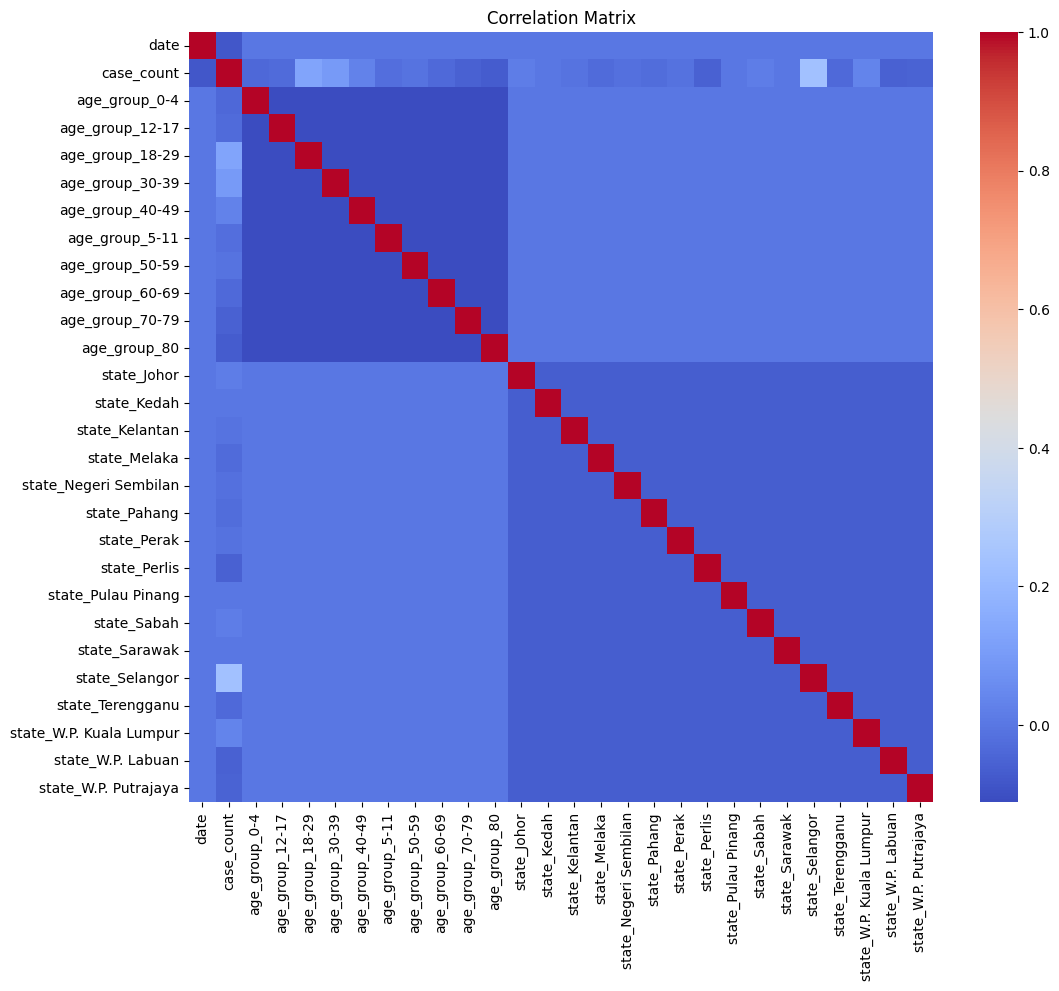

In [27]:
# Apply one-hot encoding to categorical variables
age_df_encoded = pd.get_dummies(age_df, columns=['age_group', 'state'], drop_first=False)

# Select numeric columns
correlation_matrix = age_df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:90%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 2. Cases Breakdown by Category and State  </b></p>
</div>

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:60%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 60%; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 2 description</b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:80%">
    <li>cases_new: Number of new cases reported in the 24 hours since the last report; note that this is based on the date of report and not the date of the test.</li>
    <li>cases_import: Number of new cases imported from abroad, i.e. inviduals who were infected outside the country</li>
    <li>cases_recovered: Number of recoveries from COVID-19 reported in the 24 hours since the last report</li>
    <li>cases_active: Number of COVID-19 cases who have not recovered or died</li>
    <li>cases_cluster: Number of cases attributable to clusters; the difference between new cases and the sum of cases attributable to clusters is the number of sporadic cases</li>
  </ul>


In [28]:
df_cases_breakdown= df_cases_breakdown[df_cases_breakdown['state']!='Malaysia']

### <b>I <span style='color:#85BB65'>|</span> EDA - Temporal Analysis </b>

<ipython-input-29-1701c040f5fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cases_breakdown['date'] = pd.to_datetime(df_cases_breakdown['date'])


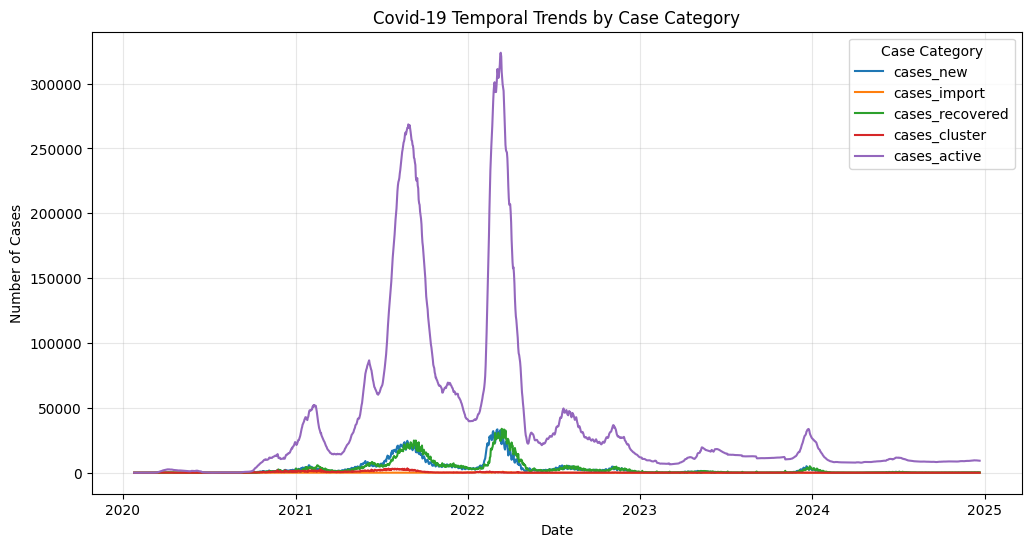

In [29]:
# Ensure the 'date' column is in datetime format
df_cases_breakdown['date'] = pd.to_datetime(df_cases_breakdown['date'])

# Group by date and sum the cases for all states
df_trends = df_cases_breakdown.groupby('date')[['cases_new', 'cases_import', 'cases_recovered', 'cases_cluster', 'cases_active']].sum()

# Plot the trends
plt.figure(figsize=(12, 6))
for column in df_trends.columns:
    plt.plot(df_trends.index, df_trends[column], label=column)

plt.title('Covid-19 Temporal Trends by Case Category')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(title='Case Category')
plt.grid(alpha=0.3)
plt.show()

### <b> II <span style='color:#85BB65'>|</span> EDA - Forecasting New Cases in 90 days using ARIMA model </b>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              cases_new   No. Observations:                 1793
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14155.630
Date:                Thu, 06 Feb 2025   AIC                          28323.260
Time:                        12:56:51   BIC                          28356.206
Sample:                    01-25-2020   HQIC                         28335.424
                         - 12-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0358      0.009      3.864      0.000       0.018       0.054
ar.L2         -0.1059      0.009    -11.514      0.000      -0.124      -0.088
ar.L3         -0.2038      0.008    -25.614      0.0

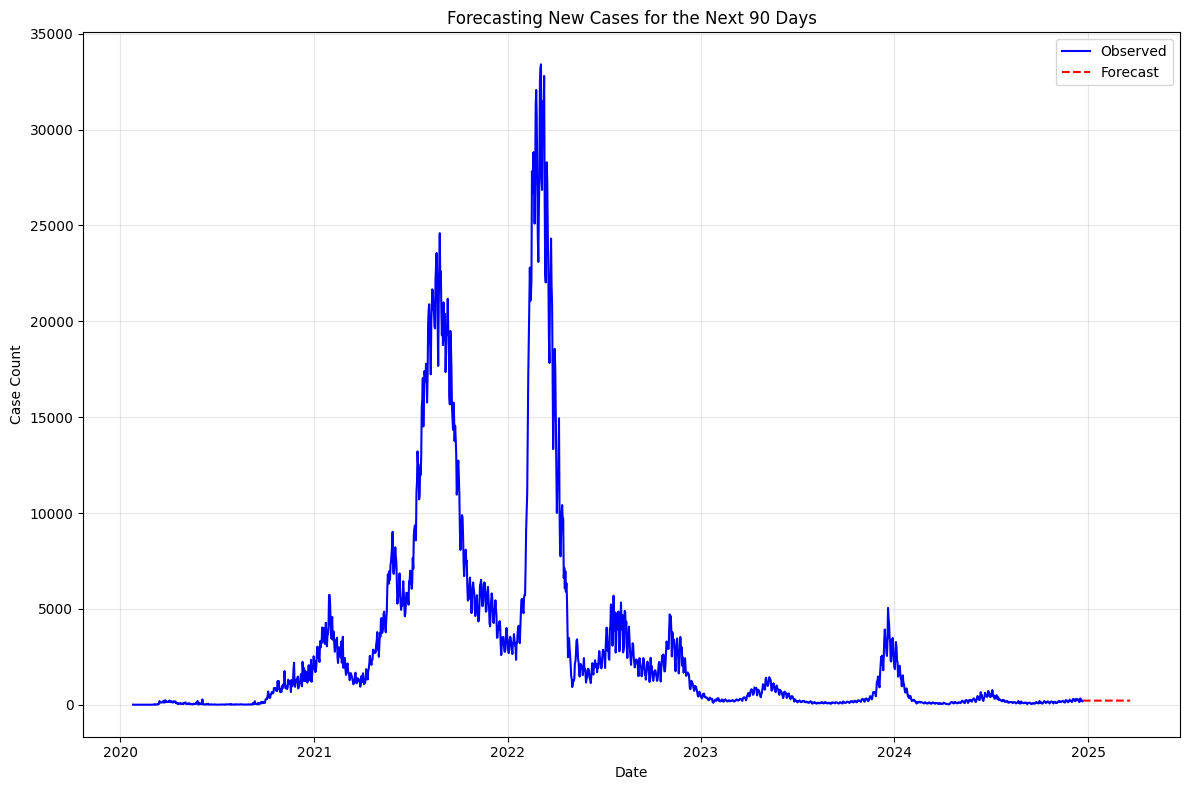

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Ensure 'date' is in datetime format
df_trends.index = pd.to_datetime(df_trends.index)

# Fit ARIMA model on 'cases_new'
model = ARIMA(df_trends['cases_new'], order=(5, 1, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast the next 30 days
forecast = model_fit.forecast(steps=90)
forecast_dates = pd.date_range(start=df_trends.index.max(), periods=91, freq='D')[1:]

# Plot the observed and forecasted values
plt.figure(figsize=(12, 8))
plt.plot(df_trends.index, df_trends['cases_new'], label='Observed', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Forecasting New Cases for the Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Case Count')
plt.legend()
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### <b> III <span style='color:#85BB65'>|</span> EDA - Data Visualization </b>

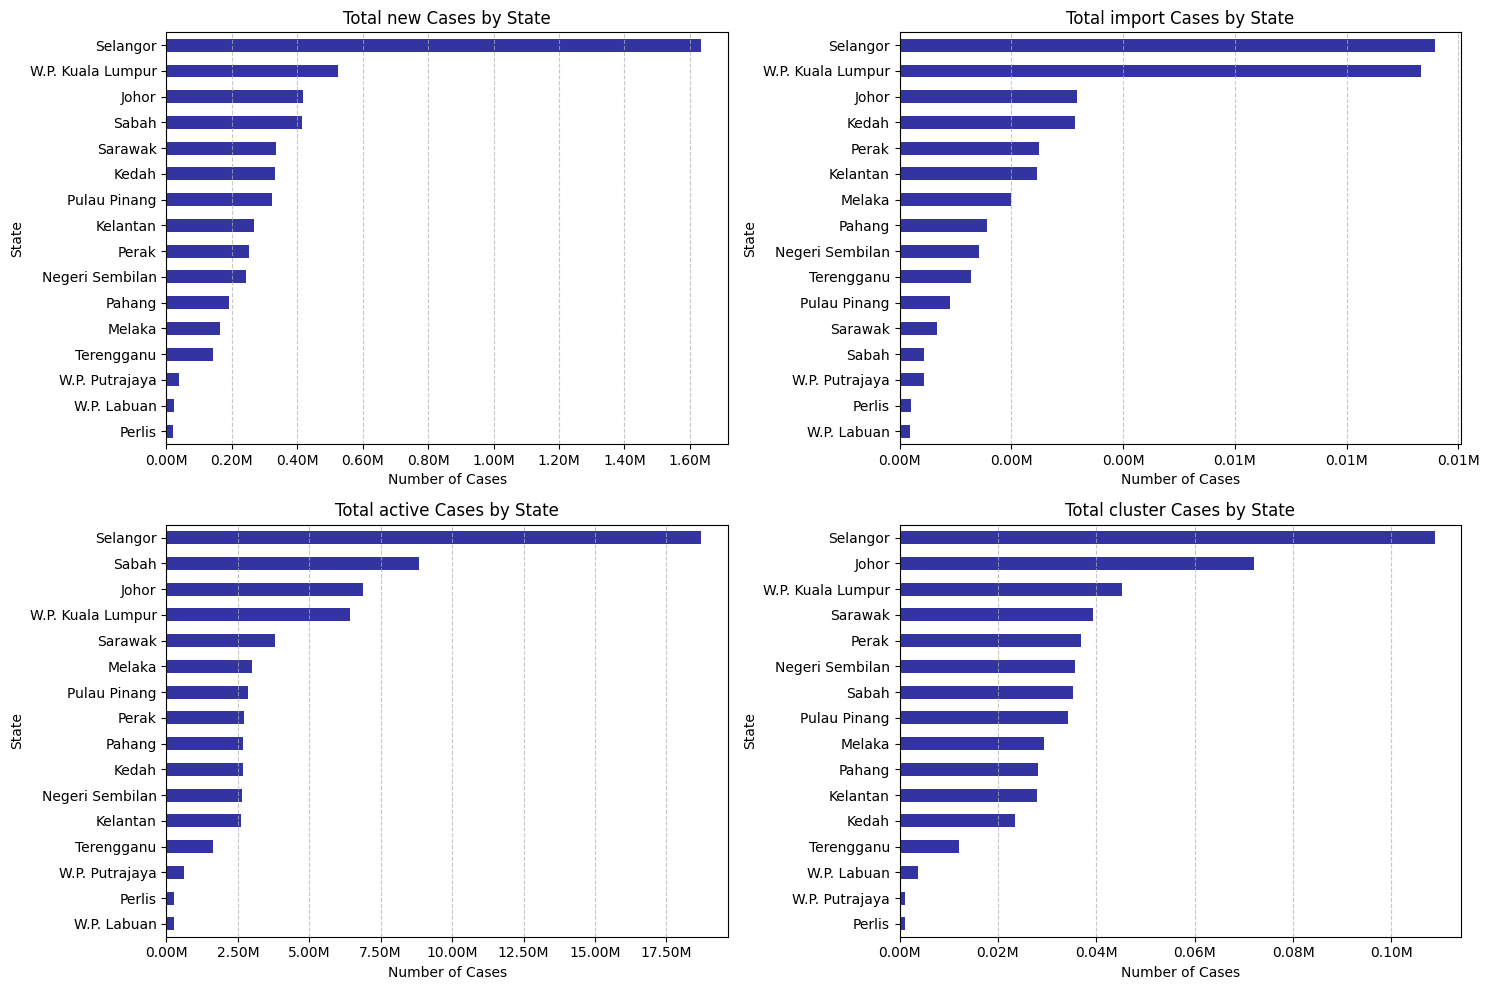

In [31]:
# Group by state and calculate the sum of cases for each category
df_summed = df_cases_breakdown.groupby('state')[['cases_new', 'cases_import', 'cases_active', 'cases_cluster']].sum()

# List of categories
categories = ['cases_new', 'cases_import', 'cases_active', 'cases_cluster']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot each category as a horizontal bar plot
for i, category in enumerate(categories):
    ax = axes.flatten()[i]
    df_summed[category].sort_values().plot(kind='barh', ax=ax, color='darkblue', alpha=0.8)
    ax.set_title(f'Total{category.replace("cases_", " ").capitalize()} Cases by State')
    ax.set_xlabel('Number of Cases')
    ax.set_ylabel('State')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.2f}M'))

plt.tight_layout()
plt.show()


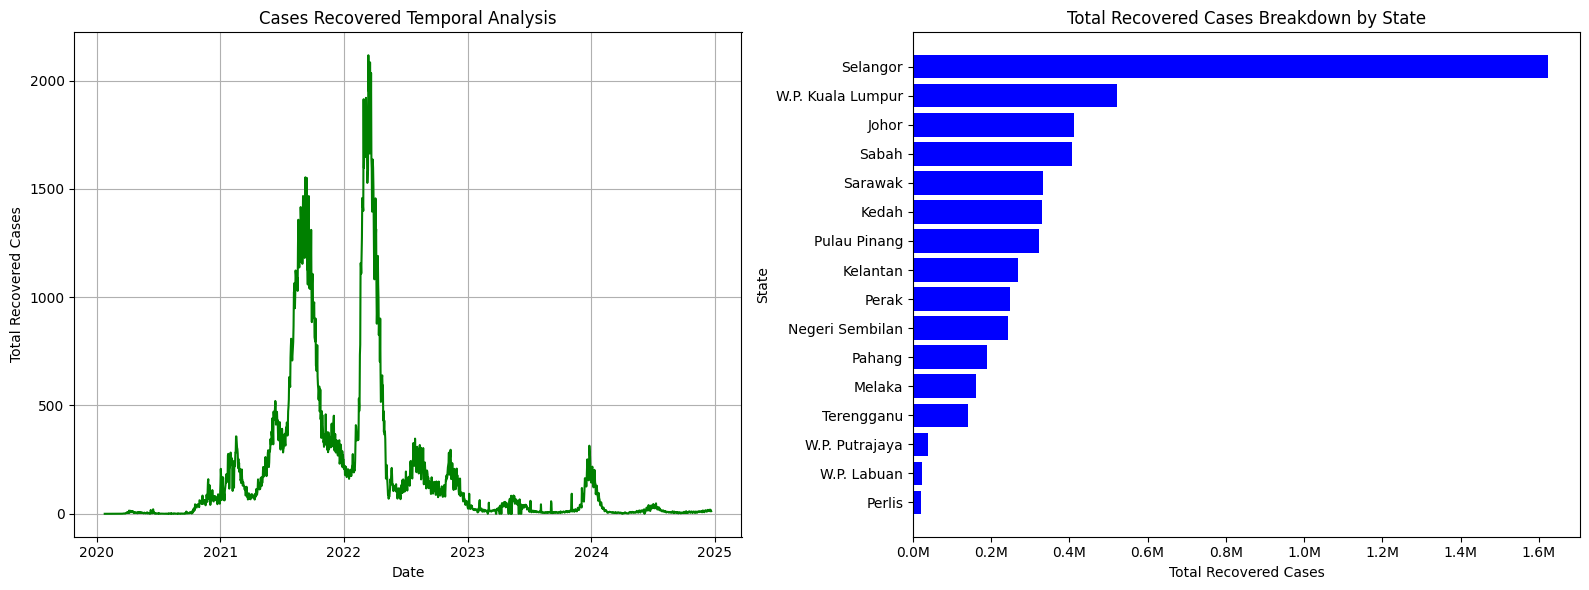

In [32]:
# Group by date for the left plot
recovery_cases_by_date = df_cases_breakdown.groupby('date').agg({'cases_recovered': 'mean'}).reset_index()

# Group by state for the right plot
recovery_cases_by_state = df_cases_breakdown.groupby('state').agg({'cases_recovered': 'sum'}).reset_index()

# Sort the recovery cases by state in descending order
recovery_cases_by_state_sorted = recovery_cases_by_state.sort_values(by='cases_recovered', ascending=True)

# Create subplots with two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Recovery Case Trend
axes[0].plot(recovery_cases_by_date['date'], recovery_cases_by_date['cases_recovered'], color='green')
axes[0].set_title('Cases Recovered Temporal Analysis')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Recovered Cases')
axes[0].grid(True)

# Right plot: Recovery Cases by State (horizontal bar plot sorted)
axes[1].barh(recovery_cases_by_state_sorted['state'], recovery_cases_by_state_sorted['cases_recovered'], color='blue')
axes[1].set_title('Total Recovered Cases Breakdown by State')
axes[1].set_xlabel('Total Recovered Cases')
axes[1].set_ylabel('State')
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M'))

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:90%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 3 and 4. Cases Breakdown by Vaccination Status and Vaccine Registration by State  </b></p>
</div>

</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:80%">
    <li>Since dataset 3 and 4 are related to vaccine, we will integrate both datasets and analyze them together in one section</li>
  </ul>

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:60%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 60%; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 3 and 4 description</b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:80%">
    <li>cases_unvax: Number of unvaccinated cases</li>
    <li>cases_pvax: Number of partially vaccinated cases</li>
    <li>cases_fvax: Number of fully vaccinated cases</li>
    <li>cases_boost: Number of boosted cases</li>
    <li>registrations: Number of vaccine registrations</li>
  </ul>

### <b> I <span style='color:#85BB65'>|</span> Date Transformation: Merge Dataset 3 and 4 </b>

In [33]:
df_covid_vaccine=df_covid_vaccine[df_covid_vaccine['state']!='Malaysia']
df_vaccine_registration = df_vaccine_registration[df_vaccine_registration['state']!='Malaysia']
df_covid_vaccine['date'] = pd.to_datetime(df_covid_vaccine['date'])
df_vaccine_registration['date']= pd.to_datetime(df_vaccine_registration['date'])
df_covid_vaccine = df_covid_vaccine.merge(df_vaccine_registration, how='outer', on=['date', 'state'])

<ipython-input-33-27b2bfcb4a4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_vaccine['date'] = pd.to_datetime(df_covid_vaccine['date'])
<ipython-input-33-27b2bfcb4a4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vaccine_registration['date']= pd.to_datetime(df_vaccine_registration['date'])


In [34]:
df_covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28688 entries, 0 to 28687
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           28688 non-null  datetime64[ns]
 1   state          28688 non-null  object        
 2   cases_unvax    28688 non-null  int64         
 3   cases_pvax     28688 non-null  int64         
 4   cases_fvax     28688 non-null  int64         
 5   cases_boost    28688 non-null  int64         
 6   registrations  5840 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.5+ MB


### <b> II <span style='color:#85BB65'>|</span> EDA - Data Visualization </b>

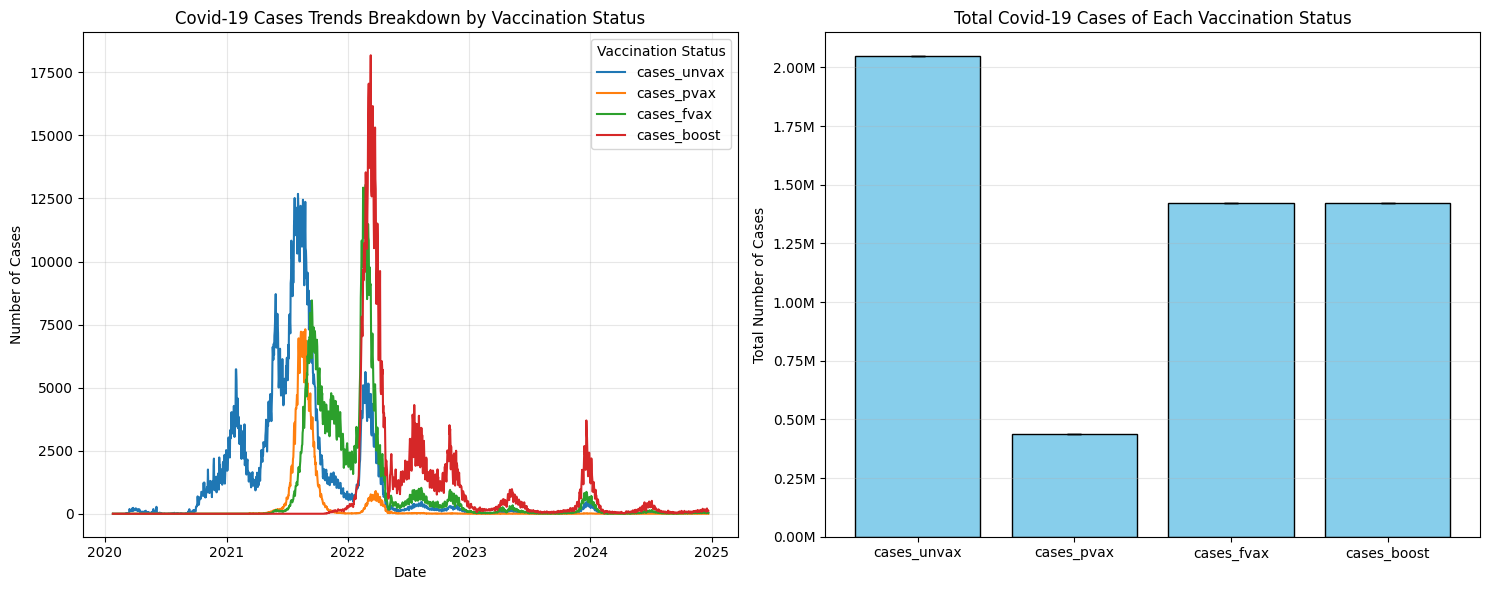

In [35]:
# Ensure 'date' column is in datetime format
df_covid_vaccine['date'] = pd.to_datetime(df_covid_vaccine['date'])

# Calculate the sum and standard deviation for each vaccination status
sum_cases = df_covid_vaccine[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].sum()
std_cases = df_covid_vaccine[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].std()

# Create subplots (left: trend analysis, right: bar plot with error bars)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Trend analysis of cases
df_trends = df_covid_vaccine.groupby('date')[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].sum()
for column in df_trends.columns:
    axes[0].plot(df_trends.index, df_trends[column], label=column)

axes[0].set_title('Covid-19 Cases Trends Breakdown by Vaccination Status')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Cases')
axes[0].legend(title='Vaccination Status')
axes[0].grid(alpha=0.3)

# Right plot: Bar plot with error bars for sum of vaccination status cases
vaccination_statuses = ['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']

axes[1].bar(vaccination_statuses, sum_cases, yerr=std_cases, capsize=5, color='skyblue', edgecolor='black')
axes[1].set_title('Total Covid-19 Cases of Each Vaccination Status')
axes[1].set_ylabel('Total Number of Cases')
axes[1].grid(axis='y', alpha=0.3)
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.2f}M'))


# Layout adjustments and show plot
plt.tight_layout()
plt.show()

**Observation** :
<li> The first plot shows that at the initial phase, most Covid-19 cases are unvaccinated.</li>
<li> After mid of 2022, most of them are fully vaccinated and boosted. </li>
<li> The secong plot shows that total number of unvaccinated was the highest, followed by fully vaccinated and boosted, last by partially vaccinated.</li>

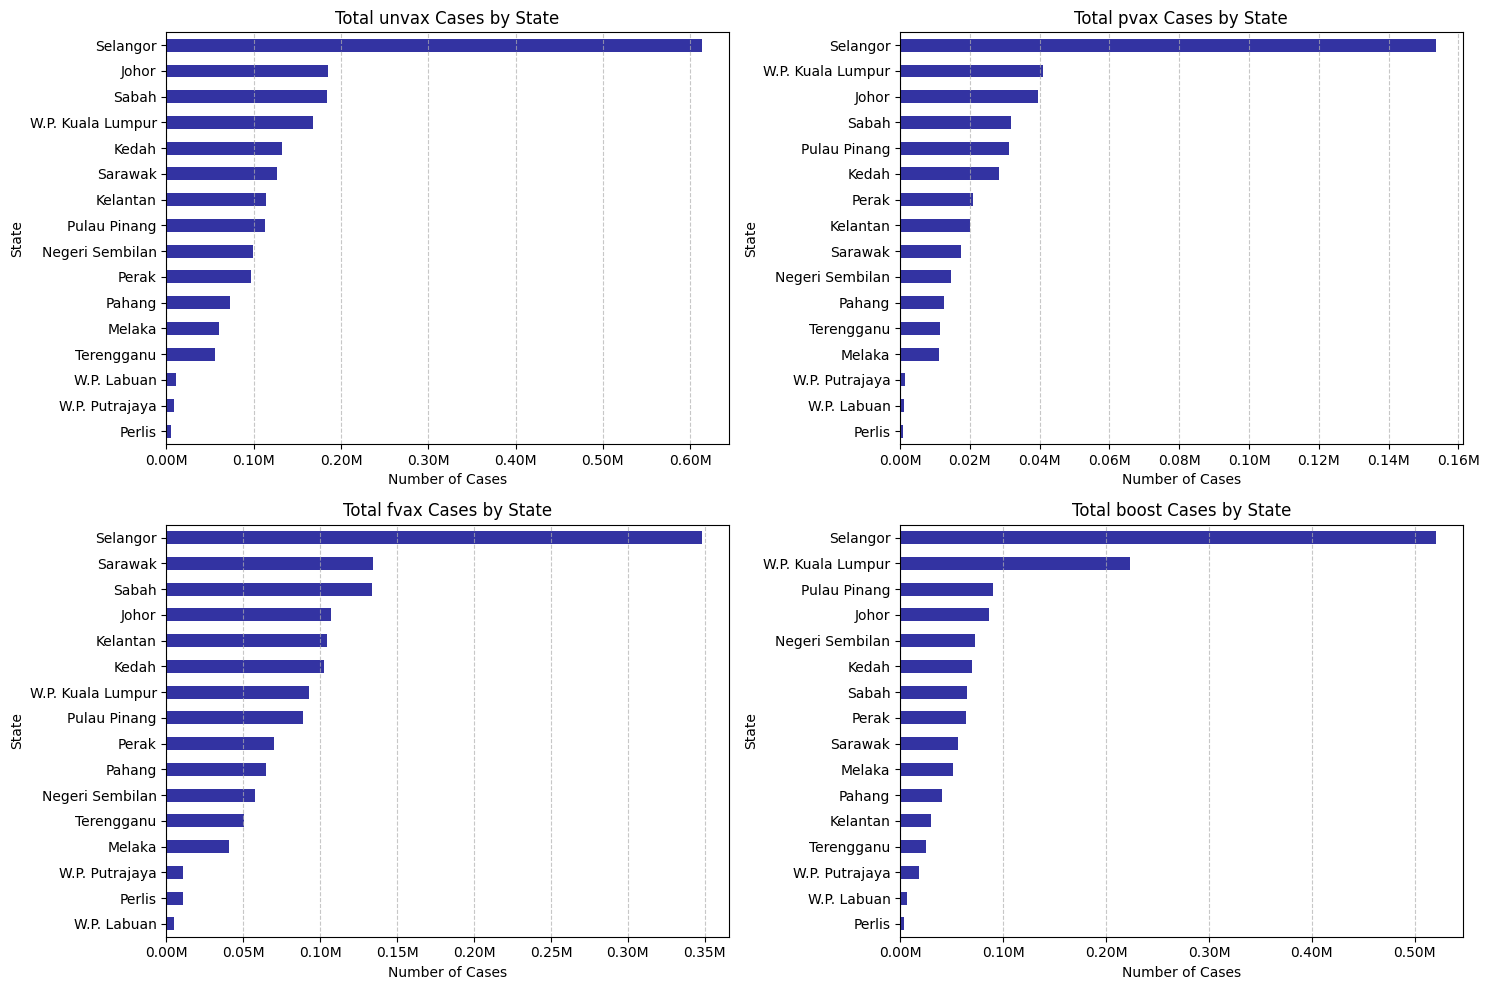

In [36]:
# Group by state and calculate the sum of cases for each category
df_summed = df_covid_vaccine.groupby('state')[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].sum()

# List of categories
categories = ['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot each category as a horizontal bar plot
for i, category in enumerate(categories):
    ax = axes.flatten()[i]
    df_summed[category].sort_values().plot(kind='barh', ax=ax, color='darkblue', alpha=0.8)
    ax.set_title(f'Total{category.replace("cases_", " ").capitalize()} Cases by State')
    ax.set_xlabel('Number of Cases')
    ax.set_ylabel('State')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.2f}M'))

plt.tight_layout()
plt.show()

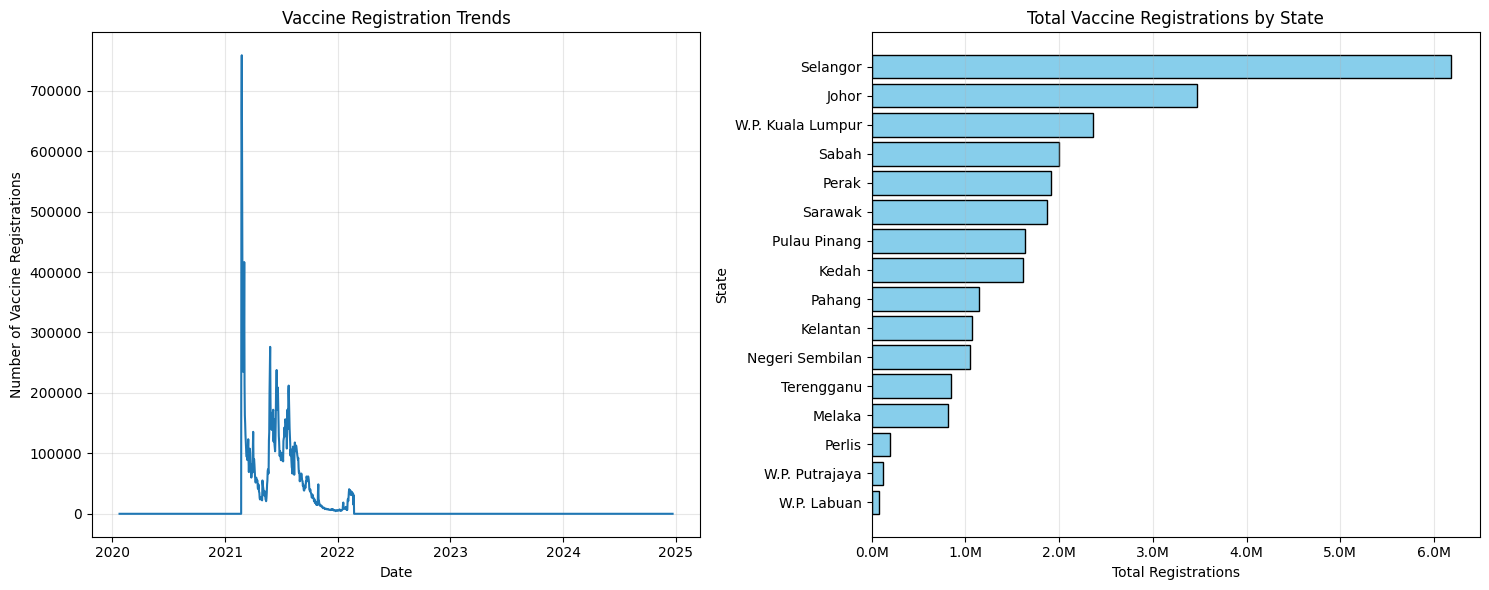

In [37]:
# Ensure 'date' column is in datetime format
df_covid_vaccine['date'] = pd.to_datetime(df_covid_vaccine['date'])

# Left plot: Total vaccine registrations trends
df_trends = df_covid_vaccine.groupby('date')['registrations'].sum().reset_index()

# Right plot: Total registrations by state
df_state_registrations = df_covid_vaccine.groupby('state')['registrations'].sum().sort_values(ascending=True)

# Create subplots (left: trend analysis, right: bar plot)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Trend analysis of vaccine registrations over time
axes[0].plot(df_trends['date'], df_trends['registrations'], label='Registrations')
axes[0].set_title('Vaccine Registration Trends')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Vaccine Registrations')
axes[0].grid(alpha=0.3)

# Right plot: Horizontal bar plot for total registrations by state
axes[1].barh(df_state_registrations.index, df_state_registrations.values, color='skyblue', edgecolor='black')
axes[1].set_title('Total Vaccine Registrations by State')
axes[1].set_xlabel('Total Registrations')
axes[1].set_ylabel('State')
axes[1].grid(axis='x', alpha=0.3)
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M'))

# Adjust layout and display plot
plt.tight_layout()
plt.show()


**Observation**:
<li> Based on the Vaccine Registration Trend, it is probably  because most people are vaccinated after Feb 2022. </li>
<li> Top three states with highest vaccine registrations are Selangor, Johor and KL.</li>


### <b> III <span style='color:#85BB65'>|</span> EDA - Hypothesis Testing</b>

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:80%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 70%; letter-spacing: 1px; margin: 0; width: 1000%;"><b> Does vaccinations have a significant effect on the number of covid cases? </b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:57%">
    <li>Null Hypothesis (H₀): There is no significant difference of vaccinations to covid-19 cases </li>
    <li>Alternative Hypothesis (H₁): There is a significant difference of vaccinations to covid-19 cases</li>
  </ul>

In [38]:
# Group the data by vaccination status and collect the cases for each group
cases_by_vaccination = {
    'unvaccinated': df_covid_vaccine['cases_unvax'],
    'partially_vaccinated': df_covid_vaccine['cases_pvax'],
    'fully_vaccinated': df_covid_vaccine['cases_fvax'],
    'boosted': df_covid_vaccine['cases_boost']
}

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(cases_by_vaccination['unvaccinated'],
                                  cases_by_vaccination['partially_vaccinated'],
                                  cases_by_vaccination['fully_vaccinated'],
                                  cases_by_vaccination['boosted'])

# Print the test results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Hypothesis testing conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in COVID-19 cases between vaccination statuses.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in COVID-19 cases between vaccination statuses.")

F-statistic: 358.097058504385
P-value: 1.666297757859043e-231
Reject the null hypothesis. There is a significant difference in COVID-19 cases between vaccination statuses.


In [39]:
# Group the data by vaccination status and collect the cases for each group
df_covid_vaccine_melted = df_covid_vaccine[['cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_boost']].melt(var_name='vaccination_status', value_name='cases')

# Run the Tukey HSD test
tukey_result = pairwise_tukeyhsd(df_covid_vaccine_melted['cases'], df_covid_vaccine_melted['vaccination_status'], alpha=0.05)

# Print the summary of Tukey HSD test results
print(tukey_result.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
cases_boost  cases_fvax  -0.0696   1.0  -4.5234   4.3842  False
cases_boost  cases_pvax  -34.391   0.0 -38.8448 -29.9372   True
cases_boost cases_unvax  21.7295   0.0  17.2757  26.1833   True
 cases_fvax  cases_pvax -34.3214   0.0 -38.7752 -29.8676   True
 cases_fvax cases_unvax  21.7991   0.0  17.3453  26.2529   True
 cases_pvax cases_unvax  56.1205   0.0  51.6667  60.5743   True
---------------------------------------------------------------


**Key observation**:
- There is a significance difference between boosted and fully vaccinated groups compared to partially and unvaccinated groups.
- There is small difference between boosted and fully vaccinated groups.
- Vaccination status does have a significant impact on the number of COVID-19 cases

<div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:90%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 24px; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 5. Covid-19 Death Rate  </b></p>
</div>

# <div style="color: #FFA500; display: inline-block; border-radius: 15px; background-color: #FFEFD5; font-family: 'Arial', sans-serif; overflow: hidden; border: 5px solid #FFA500;width:60%"><p style="padding: 15px; color: #FFA500; overflow: hidden; font-size: 60%; letter-spacing: 1px; margin: 0; width: 750%;"><b> Dataset 5 description</b></b></p>
</div>
  <ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:80%">
    <li>date: Date on which the deceased was pronunced dead, in YYYY-MM-DD format</li>
    <li>date_announced: Date on which the death was registered into the COVID-19 deaths database, in YYYY-MM-DD format</li>
    <li>date_positive: Date on which the deceased was confirmed to be COVID-19 positive, in YYYY-MM-DD format</li>
    <li>date_dose1: Date of the deceased's first COVID-19 vaccination, if any, in YYYY-MM-DD format</li>
    <li>date_dose2: Date of the deceased's second COVID-19 vaccination, if any, in YYYY-MM-DD format. This field is intentionally nulled for individuals who received a single-dose COVID-19 vaccine such as Cansino.</li>
    <li>date_dose3: Date of the deceased's booster COVID-19 vaccination, if any, in YYYY-MM-DD format</li>
    <li>brand1: First dose vaccine brand</li>
    <li>brand2: Second dose vaccine brand</li>
    <li>brand3: Third dose vaccine brand</li>
    <li>state: State in Malaysia </li>
    <li>age: Age at the time of death, rounded to the nearest integer.</li>
    <li>male: Binary variable indicate male or female</li>
    <li>bid: Binary variable indicating whether the deceased died in a hospital (0), or was brought in dead (1)</li>
    <li>malaysian: Binary variable indicating whether the deceased was Malaysian (1) or non-Malaysian (0)</li>
    <li>comorb: Binary variable indicating whether the deceased had comorbidities (1) or was otherwise healthy (0).</li>
  </ul>

In [40]:
df_death.head()

,date,date_announced,date_positive,date_dose1,date_dose2,date_dose3,brand1,brand2,brand3,state,age,male,bid,malaysian,comorb
0,2020-03-17,2020-03-17,2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,Johor,34,1,0,1,1
1,2020-03-17,2020-03-17,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,Sarawak,60,1,0,1,1
2,2020-03-20,2020-03-20,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,58,1,0,1,1
3,2020-03-21,2020-03-21,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,Melaka,50,1,0,1,1
4,2020-03-22,2020-03-22,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,Sarawak,80,0,1,1,1


In [41]:
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37351 entries, 0 to 37350
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            37351 non-null  object
 1   date_announced  37351 non-null  object
 2   date_positive   37351 non-null  object
 3   date_dose1      14876 non-null  object
 4   date_dose2      9276 non-null   object
 5   date_dose3      1543 non-null   object
 6   brand1          14876 non-null  object
 7   brand2          9276 non-null   object
 8   brand3          1543 non-null   object
 9   state           37351 non-null  object
 10  age             37351 non-null  int64 
 11  male            37351 non-null  int64 
 12  bid             37351 non-null  int64 
 13  malaysian       37351 non-null  int64 
 14  comorb          37351 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 4.3+ MB


### <b> I <span style='color:#85BB65'>|</span> Feature Engineering: Calculate Durations from Date Positive to Date Death</b>

In [42]:
df_death['date'] = pd.to_datetime(df_death['date'])
df_death['date_positive'] = pd.to_datetime(df_death['date_positive'])
df_death['days_to_die'] = (df_death['date'] - df_death['date_positive']).dt.days

### <b> II <span style='color:#85BB65'>|</span> Feature Engineering: Assign age group for each death age</b>
<ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:40%">
    <b>Follow covid-19 cases by age group</b>
    <li>age group: '0-4', '5-11', '12-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'</li>
<ul>

In [43]:
# Define age bins and corresponding labels
age_bins = [0, 4, 11, 17, 29, 39, 49, 59, 69, 79, float('inf')]
age_labels = ['0-4', '5-11', '12-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Assign age groups
df_death['age_group'] = pd.cut(df_death['age'], bins=age_bins, labels=age_labels, right=True)

### <b> III <span style='color:#85BB65'>|</span> Feature Engineering: Create 'Gender' column from 'Male' column</b>
<ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:40%">
    <li>'Male'=1 -> 'Gender' = 'Male' </li>
    <li>'Male'=0 -> 'Gender' = 'Female'</li>
<ul>

In [44]:
# Create a new column 'gender' based on the 'male' column
df_death['gender'] = df_death['male'].apply(lambda x: 'Male' if x == 1 else 'Female')

### <b> IV <span style='color:#85BB65'>|</span> Feature Engineering: Create 'Death count'column</b>

In [45]:
df_death['death_count'] =1

### <b> V <span style='color:#85BB65'>|</span> EDA - Data Visualization Bivariate Analysis </b>

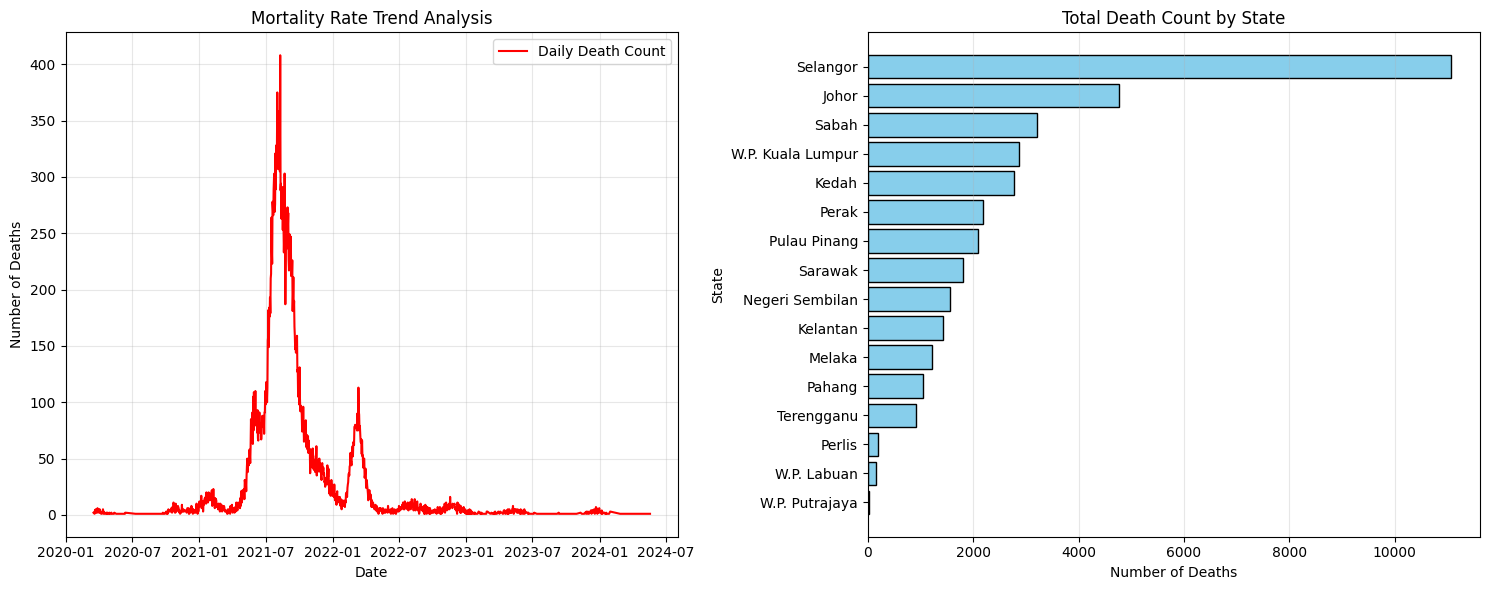

In [46]:
# Ensure 'date' column is in datetime format
df_death['date'] = pd.to_datetime(df_death['date'])

# Left Plot: Group by date for daily death counts
death_counts_by_date = df_death.groupby('date').size()

# Right Plot: Group by state for total death counts
death_counts_by_state = df_death['state'].value_counts().sort_values(ascending=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left Plot: Temporal analysis
axes[0].plot(death_counts_by_date.index, death_counts_by_date.values, color='red', label='Daily Death Count')
axes[0].set_title('Mortality Rate Trend Analysis')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Deaths')
axes[0].grid(alpha=0.3)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=0)

# Right Plot: Total death count by state
axes[1].barh(death_counts_by_state.index, death_counts_by_state.values, color='skyblue', edgecolor='black')
axes[1].set_title('Total Death Count by State')
axes[1].set_xlabel('Number of Deaths')
axes[1].set_ylabel('State')
axes[1].grid(axis='x', alpha=0.3)

# Layout adjustments and show plot
plt.tight_layout()
plt.show()

**Observation**:
- From the first plot, we notice a significant spike in deaths between July to September 2021.
- Looking at the death count by state, Selangor remains the state with the highest number of death.


<ipython-input-47-6e74aafff444>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = df_death.groupby(['age_group', 'gender']).size().unstack(fill_value=0)


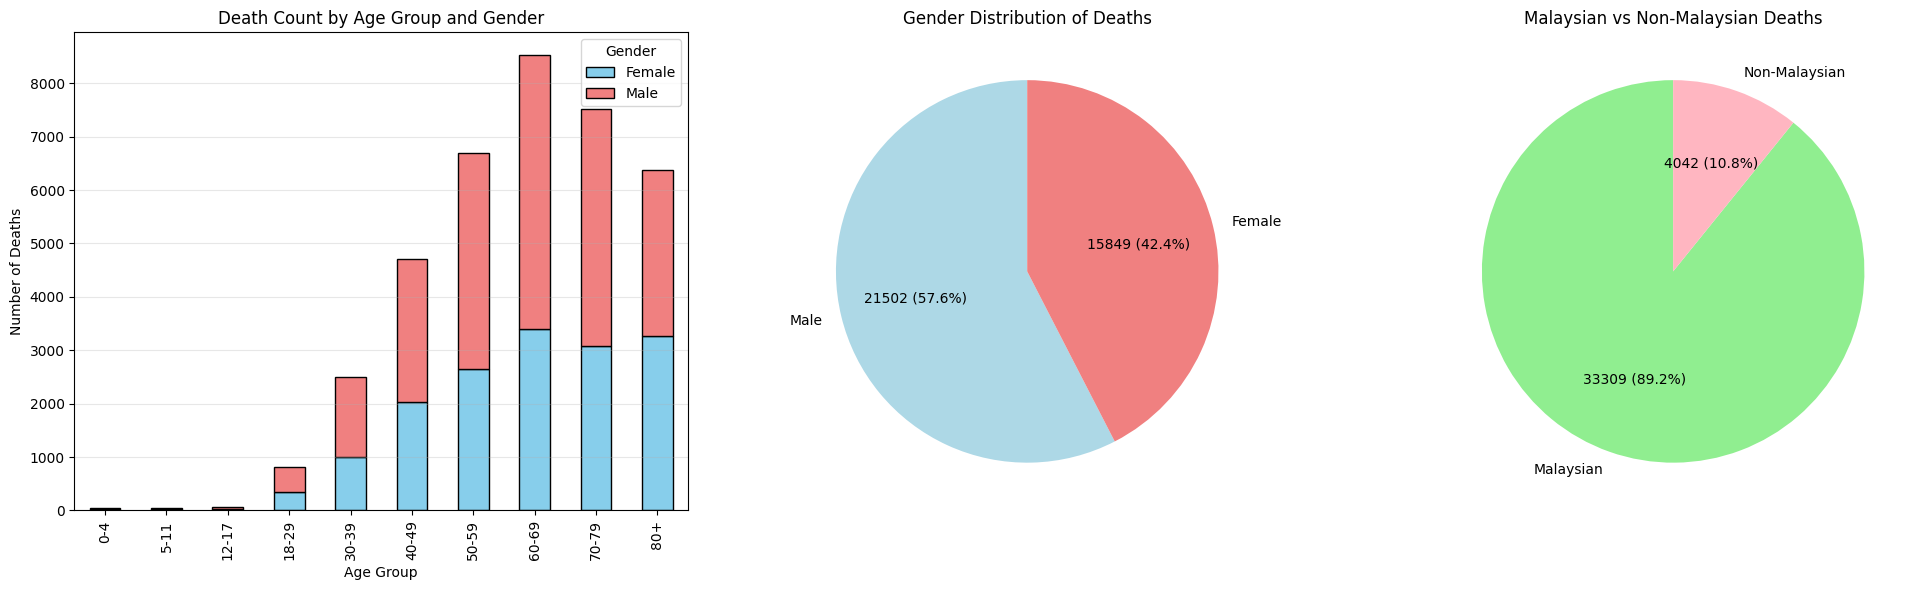

In [47]:
# Group data by age group and gender
age_gender_counts = df_death.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Group data by gender and count deaths
gender_counts = df_death['gender'].value_counts()

# Group data by citizenship and count deaths
malaysian_counts = df_death['malaysian'].value_counts()
malaysian_labels = ['Malaysian', 'Non-Malaysian']

# Function to display both actual counts and percentages
def autopct_with_counts(pct, all_vals):
    absolute = int(round(pct / 100.0 * sum(all_vals)))
    return f"{absolute} ({pct:.1f}%)"

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Left plot: Stacked bar plot for age group distribution by gender
age_gender_counts.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'lightcoral'],
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('Death Count by Age Group and Gender')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Number of Deaths')
axes[0].legend(title='Gender')
axes[0].grid(axis='y', alpha=0.3)

# Middle plot: Pie chart for gender distribution
axes[1].pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct=lambda pct: autopct_with_counts(pct, gender_counts.values),
    colors=['lightblue', 'lightcoral'],
    startangle=90
)
axes[1].set_title('Gender Distribution of Deaths')

# Right plot: Pie chart for Malaysian vs Non-Malaysian distribution
axes[2].pie(
    malaysian_counts.values,
    labels=malaysian_labels,
    autopct=lambda pct: autopct_with_counts(pct, malaysian_counts.values),
    colors=['lightgreen', 'lightpink'],
    startangle=90
)
axes[2].set_title('Malaysian vs Non-Malaysian Deaths')

# Adjust layout and display
plt.tight_layout()
plt.show()


**Now, we might wonder—who is more vulnerable to mortality?** <br/>
- Well, the data shows a clear trend: as age increases, so does the number of deaths. This aligns with expectations, as older individuals tend to have weaker immune systems.
- Interestingly, males show a higher risk of death, particularly in the 50 to 79 age group.
- Lastly, most deaths occurred among Malaysians


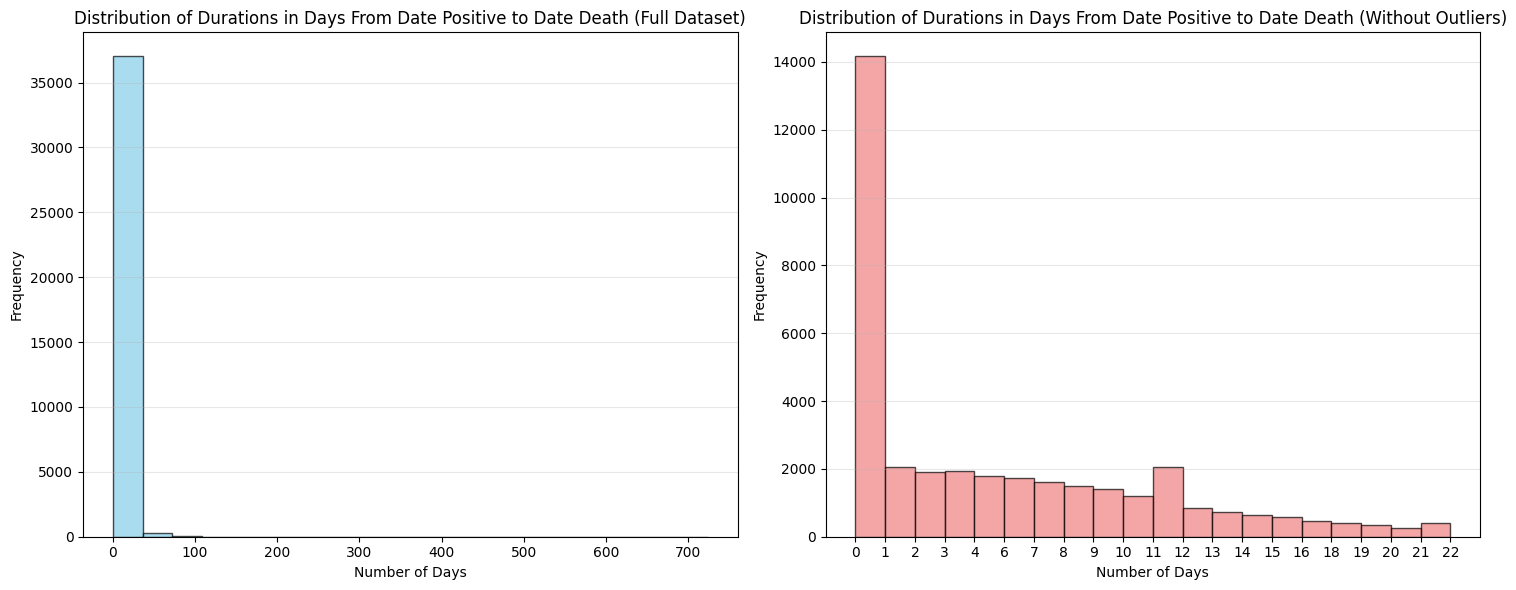

In [48]:
# Calculate the IQR and determine outlier thresholds
Q1 = df_death['days_to_die'].quantile(0.25)
Q3 = df_death['days_to_die'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df_death[(df_death['days_to_die'] >= lower_bound) & (df_death['days_to_die'] <= upper_bound)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Full dataset
axes[0].hist(df_death['days_to_die'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Durations in Days From Date Positive to Date Death (Full Dataset)')
axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)

# Right plot: Zoomed-in dataset (without outliers)
n, bins, patches = axes[1].hist(df_no_outliers['days_to_die'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Durations in Days From Date Positive to Date Death (Without Outliers)')
axes[1].set_xlabel('Number of Days')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.3)

# Set x-axis ticks to all bin edges
axes[1].set_xticks(bins)
axes[1].set_xticklabels([f"{edge:.0f}" for edge in bins], rotation=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Have you wondered how long it takes for patients to go from testing positive to death?** <br/>
After removing outliers, it reveals that most deaths occur within 1 to 22 days, with many of them happening on the same day—probably due to late diagnosis.

<ipython-input-49-16a83fce41c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=bins, labels=labels, right=False)


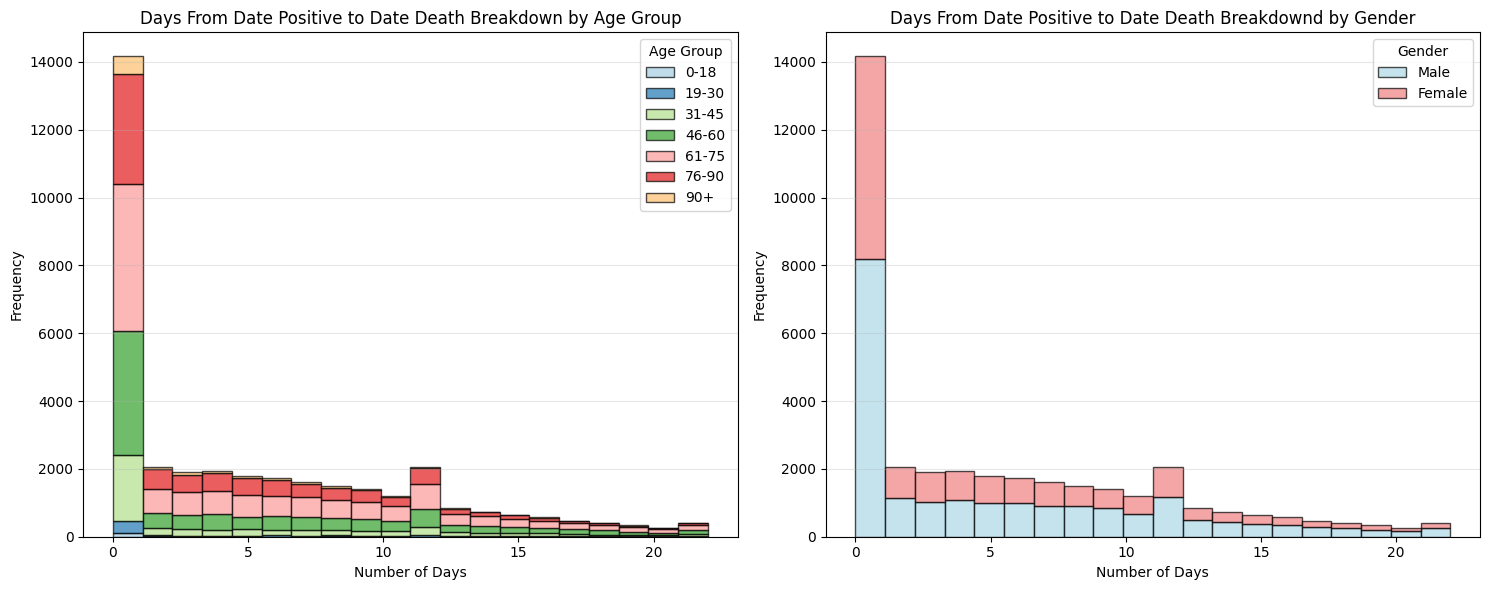

In [49]:
# Create age groups if not already defined
bins = [0, 18, 30, 45, 60, 75, 90, 120]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '90+']
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=bins, labels=labels, right=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Stacked histogram by age group
age_groups = df_no_outliers['age_group'].unique().categories
age_group_data = [df_no_outliers[df_no_outliers['age_group'] == group]['days_to_die'] for group in age_groups]

axes[0].hist(
    age_group_data,
    bins=20,
    stacked=True,
    label=age_groups,
    color=plt.cm.Paired.colors[:len(age_groups)],
    edgecolor='black',
    alpha=0.7
)
axes[0].set_title('Days From Date Positive to Date Death Breakdown by Age Group')
axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Age Group')
axes[0].grid(axis='y', alpha=0.3)

# Right plot: Stacked histogram by gender
genders = df_no_outliers['gender'].unique()
gender_data = [df_no_outliers[df_no_outliers['gender'] == gender]['days_to_die'] for gender in genders]

axes[1].hist(
    gender_data,
    bins=20,
    stacked=True,
    label=genders,
    color=['lightblue', 'lightcoral'],
    edgecolor='black',
    alpha=0.7
)
axes[1].set_title('Days From Date Positive to Date Death Breakdownd by Gender')
axes[1].set_xlabel('Number of Days')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Gender', labels=['Male', 'Female'])
axes[1].grid(axis='y', alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

**You might also wonder are days to death affected by demographic? **<br/>
Well, from the data, it appears that age group and gender are fairly evenly distributed across the duration, which means no strong link between age group and days to death, as well as between age groups and days to death

<a id='EDA'></a>
# <p style="background-color:#FF6347;font-family:Verdana, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:10px;padding:10px;"><b>4|</b> 📊 Data Integration 📊 </p>

### Data Integration Workflow

![image.png](attachment:image.png)

### <b> I <span style='color:#85BB65'>|</span> Merge dataset 2, 3, 4 and 5 </b>

<ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:60%">
    <li>Create a 'uniqueID column' by combining 'date' and 'state' to merge the four datasets </li>
    <li> For df_death, calculate the cumulative death count for each date and state, as each row represents a single death, while the other dataset is cumulative </li>
<ul>

In [50]:
df_covid_vaccine['uniqueID']=df_covid_vaccine['date'].astype(str)+'_'+df_covid_vaccine['state']

In [51]:
# Check for duplicates in the 'uniqueID' column
duplicates = df_covid_vaccine[df_covid_vaccine['uniqueID'].duplicated()]
duplicates

,date,state,cases_unvax,cases_pvax,cases_fvax,cases_boost,registrations,uniqueID


In [52]:
df_cases_breakdown['uniqueID']=df_cases_breakdown['date'].astype(str)+'_'+df_cases_breakdown['state']

In [53]:
# Check for duplicates in the 'uniqueID' column
duplicates = df_cases_breakdown[df_cases_breakdown['uniqueID'].duplicated()]
duplicates

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,uniqueID


In [54]:
# Merge dataset 2, 3 and 4
df_merged = pd.merge(left = df_cases_breakdown, right= df_covid_vaccine, on= 'uniqueID', how= 'outer')

In [55]:
df_merged.drop(columns=['date_y', 'state_y'], inplace= True)
df_merged.rename(columns={'date_x':'date', 'state_x':'state'},inplace=True)

In [56]:
# Calculate the cumulative death count for each date and state, as each row represents a single death, while the other dataset is cumulative
df_death['date_state']=df_death['date'].astype(str)+'_'+df_death['state']
death_cumulative_by_state = df_death.groupby('date_state', as_index=False).agg({
    'date': 'first',
    'date_announced': 'first',
    'date_positive': 'first',
    'state': 'first',
    'death_count': 'sum'})

In [57]:
# Check for duplicates in the 'date_state' column
duplicates = death_cumulative_by_state[death_cumulative_by_state['date_state'].duplicated()]
duplicates

,date_state,date,date_announced,date_positive,state,death_count


In [58]:
# Merge dataset 2, 3, 4 and 5
final_df = pd.merge(left = df_merged, right= death_cumulative_by_state, left_on= 'uniqueID', right_on='date_state' ,how= 'outer')

In [59]:
final_df.drop(columns=['date_y', 'state_y', 'date_state', 'uniqueID'], inplace= True)
final_df.rename(columns={'date_x':'date', 'state_x':'state', 'registrations':'vaccine_registrations'},inplace=True)

### <b> II <span style='color:#85BB65'>|</span> Merge dataset 1 and 5 to have covid cases and death count breakdown by state and age group</b>

<ul style="border: 2px solid #4CAF50; border-radius: 8px; margin-top: 10px; width:60%">
    <li>Create a 'uniqueID column' by combining 'date', 'state' and 'age group' to merge the two datasets </li>
    <li> For df_death, calculate the cumulative death count for each date, state and age group, as each row represents a single death, while the other dataset is cumulative </li>
<ul>

In [60]:
df_death['uniqueID']=df_death['date'].astype(str)+'_'+df_death['state']+'_'+df_death['age_group'].astype(str)
death_cumulative = df_death.groupby('uniqueID', as_index=False).agg({
    'date': 'first',
    'date_announced': 'first',
    'date_positive': 'first',
    'state': 'first',
    'age_group': 'first',
    'gender': 'first',
    'death_count': 'sum'})

In [61]:
# Check for duplicates in the 'uniqueID' column
duplicates = death_cumulative[death_cumulative['uniqueID'].duplicated()]
duplicates

,uniqueID,date,date_announced,date_positive,state,age_group,gender,death_count


In [62]:
age_df['uniqueID']=age_df['date'].astype(str)+'_'+age_df['state']+'_'+age_df['age_group'].astype(str)

In [63]:
# Check for duplicates in the 'uniqueID' column
duplicates = age_df[age_df['uniqueID'].duplicated()]
duplicates

,date,state,case_count,age_group,uniqueID


In [64]:
# Merge dataset 1 and 5
df_merged2 = pd.merge(left = age_df, right= death_cumulative, on= 'uniqueID', how= 'outer')

In [65]:
df_merged2.drop(columns=['date_y', 'state_y', 'age_group_y', 'uniqueID'], inplace= True)
df_merged2.rename(columns={'date_x':'date', 'state_x':'state', 'age_group_x':'age_group'},inplace=True)

<a id='2'></a>

# <p style="background-color: #20B2AA; font-family: Arial, sans-serif; color: #FFFFFF; font-size: 80%; text-align: center; border-radius: 10px; padding: 15px; border: 4px solid yellow; border-style: dashed;"><b>5|</b> 🔄 Feature Engineering 🤖 </p>

In [66]:
final_df.head()

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,vaccine_registrations,date_announced,date_positive,death_count
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,0,NaN,NaN,NaT,NaN
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaT,NaN
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaT,NaN
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,0,NaN,NaN,NaT,NaN
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaT,NaN


In [67]:
df_merged2.head()

,date,state,case_count,age_group,date_announced,date_positive,gender,death_count
0,2020-01-25,Johor,0.0,0-4,NaN,NaT,NaN,NaN
1,2020-01-25,Johor,0.0,12-17,NaN,NaT,NaN,NaN
2,2020-01-25,Johor,0.0,18-29,NaN,NaT,NaN,NaN
3,2020-01-25,Johor,0.0,30-39,NaN,NaT,NaN,NaN
4,2020-01-25,Johor,1.0,40-49,NaN,NaT,NaN,NaN


### <b> I <span style='color:#85BB65'>|</span> To Achieve Goal 1: What factors significantly influence COVID-19 in Malaysia</b>




To address this:

*   **Active Case Severity**: How severe active cases are compared to new cases. States or time periods with high active case severity could indicate strained healthcare systems.
*   **Case Fatality Rate**: The proportion of deaths among all reported cases. This metric highlights states or time periods with high fatality risks, warranting targeted interventions.
*   **Recovery Rate**: The proportion of recovered cases among active and recovered cases. High recovery rates suggest effective healthcare or lower severity of cases, while low rates highlight states needing attention.




In [68]:
# Drop rows with null values for relevant features in final_df
final_df_clean = final_df.dropna(subset=['cases_active', 'cases_new', 'death_count', 'cases_recovered'])

# Feature 1: Active Case Severity
final_df_clean['active_case_severity'] = final_df_clean['cases_active'] / (final_df_clean['cases_new'] + 1) * 100

# Feature 2: Case Fatality Rate
final_df_clean['case_fatality_rate'] = final_df_clean['death_count'] / (final_df_clean['cases_new'] + 1) * 100

# Feature 3: Recovery Rate
final_df_clean['recovery_rate'] = final_df_clean['cases_recovered'] / (
    final_df_clean['cases_recovered'] + final_df_clean['cases_active'] + 1
) * 100

# Validate the features
print(final_df_clean[['active_case_severity', 'case_fatality_rate', 'recovery_rate']].describe())


       active_case_severity  case_fatality_rate  recovery_rate
count           6349.000000         6349.000000    6349.000000
mean            1670.302483            2.338291       8.101696
std             4556.776688            8.006280      22.416395
min           -10250.000000            0.010336    -627.272727
25%              872.779923            0.473934       5.221719
50%             1137.981651            0.961538       7.575758
75%             1544.836272            1.791390      10.295602
max           183300.000000          100.000000     990.000000


<ipython-input-68-1bad5d126106>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_clean['active_case_severity'] = final_df_clean['cases_active'] / (final_df_clean['cases_new'] + 1) * 100
<ipython-input-68-1bad5d126106>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_clean['case_fatality_rate'] = final_df_clean['death_count'] / (final_df_clean['cases_new'] + 1) * 100
<ipython-input-68-1bad5d126106>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

### <b> II <span style='color:#85BB65'>|</span> To Achieve Goal 2: Which demographic is the most vulnerable to severe outcomes?</b>

To address this:


*   **Age Group Death Rate**: Mortality rate within age groups.
*   **Gender Death Rate**: Mortality rate by gender.
*   **Severe Outcome Risk**: Aggregated risk factor for demographics.





In [69]:
# Drop rows with null values for relevant features in df_merged2
df_merged2_clean = df_merged2.dropna(subset=['case_count', 'death_count', 'age_group', 'gender'])

# Ensure the required column 'gender_death_rate' exists
if 'gender_death_rate' not in df_merged2_clean.columns:
    # Calculate Gender Death Rate if it does not exist
    gender_death_rate = (
        df_merged2_clean.groupby('gender')['death_count'].sum() /
        (df_merged2_clean.groupby('gender')['case_count'].sum() + 1)
    ) * 100

    # Add Gender Death Rate to df_merged2_clean
    df_merged2_clean = df_merged2_clean.merge(
        gender_death_rate.rename("gender_death_rate"),
        on='gender',
        how='left'
    )

# Feature 1: Age Group Death Rate
df_merged2_clean['age_group_death_rate'] = (
    df_merged2_clean['death_count'] / (df_merged2_clean['case_count'] + 1)
) * 100

# Feature 2: Gender Death Rate
# This is already handled in the gender_death_rate calculation above

# Feature 3: Severe Outcome Risk
df_merged2_clean['severe_outcome_risk'] = (
    df_merged2_clean['death_count'] / (df_merged2_clean['case_count'] + 1)
) * 100

# Validate the features
print(df_merged2_clean[['age_group', 'gender', 'age_group_death_rate', 'severe_outcome_risk']].head())
print(df_merged2_clean[['gender', 'gender_death_rate']].drop_duplicates())


  age_group gender  age_group_death_rate  severe_outcome_risk
0     30-39   Male                  25.0                 25.0
1     60-69   Male                  25.0                 25.0
2     50-59   Male                  50.0                 50.0
3     60-69   Male                  50.0                 50.0
4     50-59   Male                 100.0                100.0
   gender  gender_death_rate
0    Male           2.357441
5  Female           2.212537


**Observations and Issues**

1.   High Death Rates in Older Demographics:

      The data highlights that older age groups (e.g., 50–59) have significantly higher death rates and risks, aligning with known COVID-19 trends.

1.   Gender-Based Vulnerability:

      Males have a higher death rate than females, suggesting targeted health interventions for men.

1.   Inf Values:

      Infinity (inf) values in severe_outcome_risk occur when case_count is zero. This means there are records with deaths but no reported cases, which may indicate a data inconsistency.

In [70]:
#handle inf Values, replace them with Nan to avoid skewing analysis
df_merged2_clean.replace([np.inf, -np.inf], np.nan, inplace=True)


### <b> III <span style='color:#85BB65'>|</span> To Achieve Goal 3: Which states in Malaysia have the highest risk and how do vaccination rates affect outcomes?</b>

To address this:


*   **State Severity Index**: Combines deaths and active cases as a proportion of all cases. This metric combines deaths and active cases as a proportion of all new cases, giving an indication of the severity of COVID-19 in a particular state. A higher value means:

  *   The state has a higher number of active cases and/or deaths relative to the number of new cases.
  *   It indicates higher healthcare resource demand and/or the severity of outbreaks in that state.


*   **Vaccination Effectiveness**: Recovery rate versus unvaccinated rate. This measures the recovery rate versus the proportion of unvaccinated cases, indicating how effective vaccination has been in reducing severe outcomes (recovery versus unvaccinated). A higher value means:

  *   A higher number of recoveries relative to the unvaccinated population.
  *   It highlights the effectiveness of vaccination efforts in reducing COVID-19 severity.







In [71]:
# Feature 1: State Severity Index

final_df_clean['state_severity_index'] = (
    (final_df_clean['death_count'] + final_df_clean['cases_active']) /
    (final_df_clean['cases_new'] + 1)
) * 100

# Feature 2: Vaccination Effectiveness
final_df_clean['vaccination_effectiveness'] = (
    (final_df_clean['cases_recovered']) /
    (final_df_clean['cases_unvax'] + 1)
) * 100

# Drop rows with null values that may remain after feature engineering
final_df_clean = final_df_clean.dropna()

# Validate the features
print(final_df_clean[['state', 'state_severity_index', 'vaccination_effectiveness']].head())


                  state  state_severity_index  vaccination_effectiveness
6322           Kelantan            769.072165                  43.298969
6330            Sarawak           1383.582090                 188.059701
6331           Selangor           1209.753483                 156.055734
6333  W.P. Kuala Lumpur           1791.025641                 229.487179
6346            Sarawak            581.073446                  41.525424


<ipython-input-71-489584dc4a88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_clean['state_severity_index'] = (
<ipython-input-71-489584dc4a88>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_clean['vaccination_effectiveness'] = (


<a id='2'></a>

# <p style="background-color: #20B2AA; font-family: Arial, sans-serif; color: #FFFFFF; font-size: 80%; text-align: center; border-radius: 10px; padding: 15px; border: 4px solid yellow; border-style: dashed;"><b>6|</b> 🔄 Data Transformation 🤖 </p>

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Remove rows with missing values for relevant features (just to be safe before scaling)
final_df_clean = final_df_clean.dropna(subset=[
    'active_case_severity', 'case_fatality_rate', 'recovery_rate',
    'state_severity_index', 'vaccination_effectiveness'
])

df_merged2_clean = df_merged2_clean.dropna(subset=[
    'age_group_death_rate', 'gender_death_rate', 'severe_outcome_risk'
])

# Goal 1: Normalize features in final_df_clean
goal1_features = ['active_case_severity', 'case_fatality_rate', 'recovery_rate']
final_df_clean[goal1_features] = scaler.fit_transform(final_df_clean[goal1_features])

# Goal 2: Normalize features in df_merged2_clean
goal2_features = ['age_group_death_rate', 'gender_death_rate', 'severe_outcome_risk']
df_merged2_clean[goal2_features] = scaler.fit_transform(df_merged2_clean[goal2_features])

# Goal 3: Normalize features in final_df_clean
goal3_features = ['state_severity_index', 'vaccination_effectiveness']
final_df_clean[goal3_features] = scaler.fit_transform(final_df_clean[goal3_features])



In [74]:
# Check if all features for Goal 1 are scaled
print(final_df_clean[goal1_features].describe())

# Check if all features for Goal 2 are scaled
print(df_merged2_clean[goal2_features].describe())

# Check if all features for Goal 3 are scaled
print(final_df_clean[goal3_features].describe())


       active_case_severity  case_fatality_rate  recovery_rate
count           3708.000000         3708.000000    3708.000000
mean               0.072414            0.014324       0.187060
std                0.041520            0.030818       0.086099
min                0.000000            0.000000       0.000000
25%                0.048564            0.005352       0.133529
50%                0.064947            0.009873       0.176931
75%                0.086087            0.016625       0.230377
max                1.000000            1.000000       1.000000
       age_group_death_rate  gender_death_rate  severe_outcome_risk
count          12372.000000       12372.000000         12372.000000
mean               0.046074           0.599741             0.046074
std                0.078848           0.489970             0.078848
min                0.000000           0.000000             0.000000
25%                0.008274           0.000000             0.008274
50%                0.0215

### **To align with the objective of severity prediction:**

**Risk score** is proposed as the **output of model prediction**, it is a composite metric that indicates the **severity** of the Covid-19 outbreak for our current study.  

$$
Risk score = (w1 \times State\ Severity\ Index)+(w2 \times Active\ Cases\ Severity)+(w3 \times Fatality\ Rate)-(w4 \times Vaccination\ Effectiveness)
$$

<br>

**Weights are assigned as below:**

*   **w1 = 0.3**: Higher state severity index indicates higher risk for specific regions.
*   **w2 = 0.3**: Active cases severity reflects higher case numbers.
*   **w3 = 0.3**: Fatality rate shows disease severity.
*   **w4 = 0.1**: Vaccination reduces risk, so it is subtracted, it has the lowest weightage as human will still have Covid-19 even though they are vaccinated.



In [75]:
# RISK SCORING - Feature Engineering
final_df_clean['risk_scoring'] = (\
    (0.3 * final_df_clean['state_severity_index'])+\
    (0.3 * final_df_clean['active_case_severity'])+
    (0.3 * final_df_clean['case_fatality_rate'])-\
    (0.1 * final_df_clean['vaccination_effectiveness'])\
) * 100

In [76]:
# Print risk_scoring min and max to check the risk score values

print(f"Minimum risk_scoring: {final_df_clean['risk_scoring'].min()}")
print(f"Maximum risk_scoring: {final_df_clean['risk_scoring'].max()}")

Minimum risk_scoring: -6.282122028892981
Maximum risk_scoring: 85.11177347242922


In [77]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))  # Specify the range to scale to 0-100

final_df_clean['risk_scoring_scaled'] = scaler.fit_transform(
    final_df_clean[['risk_scoring']]
)


In [78]:
# Print risk_scoring min and max to check the risk score values

print(f"Minimum risk_scoring: {final_df_clean['risk_scoring_scaled'].min()}")
print(f"Maximum risk_scoring: {final_df_clean['risk_scoring_scaled'].max()}")

Minimum risk_scoring: 0.0
Maximum risk_scoring: 100.0


In [79]:
unique_values = final_df_clean['risk_scoring_scaled'].unique()
unique_counts = final_df_clean['risk_scoring_scaled'].value_counts()

print(unique_counts)

risk_scoring_scaled
9.630616     1
12.769944    1
10.022785    1
11.319426    1
9.847842     1
            ..
8.887763     1
9.087650     1
10.212935    1
9.643980     1
9.691895     1
Name: count, Length: 3708, dtype: int64


<a id='2'></a>

# <p style="background-color: #20B2AA; font-family: Arial, sans-serif; color: #FFFFFF; font-size: 80%; text-align: center; border-radius: 10px; padding: 15px; border: 4px solid yellow; border-style: dashed;"><b>7|</b> 🔄 Data Splitting 🤖 </p>

In [80]:
final_df_clean.columns

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax', 'cases_boost', 'vaccine_registrations', 'date_announced',
       'date_positive', 'death_count', 'active_case_severity',
       'case_fatality_rate', 'recovery_rate', 'state_severity_index',
       'vaccination_effectiveness', 'risk_scoring', 'risk_scoring_scaled'],
      dtype='object')

In [81]:
model_df = final_df_clean[['state', 'cases_new','cases_recovered',
       'cases_active', 'cases_cluster', 'cases_unvax', 'cases_pvax',
       'cases_fvax', 'cases_boost', 'vaccine_registrations','death_count', 'active_case_severity',
       'case_fatality_rate', 'recovery_rate', 'state_severity_index',
       'vaccination_effectiveness', 'risk_scoring_scaled']]

### <b> I <span style='color:#85BB65'>|</span> Split data into 80% training and 20% testing</b>

In [82]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) for the split
# Assuming the target variable is 'severe_outcome_risk'
# X = df_merged2_clean.drop(columns=['severe_outcome_risk'])
# y = df_merged2_clean['severe_outcome_risk']

X = model_df.drop(columns=['risk_scoring_scaled'])
y = model_df['risk_scoring_scaled']


# Perform 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # Ensure reproducibility
    # stratify=df_merged2_clean['age_group']  # Optional: Stratify based on age_group
)

# Display the shapes of the resulting datasets
print("Training Feature Set Shape:", X_train.shape)
print("Testing Feature Set Shape:", X_test.shape)
print("Training Target Set Shape:", y_train.shape)
print("Testing Target Set Shape:", y_test.shape)


Training Feature Set Shape: (2966, 16)
Testing Feature Set Shape: (742, 16)
Training Target Set Shape: (2966,)
Testing Target Set Shape: (742,)


<a id='ModelBuilding'></a>
# <p style="background-color:#4CAF50;font-family:Arial, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:5px;padding:10px;"><b>8|</b> 🏗️ Modelling 🏗️ </p>


### <b> I <span style='color:#85BB65'>|</span> Apply One-Hot Encoding for categorical variable</b>

In [83]:
# Perform One-Hot Encoding for nomial features like state

X_train = pd.get_dummies(X_train, columns=['state'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['state'], drop_first=True)


### <b> II <span style='color:#85BB65'>|</span> Model Development</b>

In [84]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# 1. Random Forest Model Fitting using Training Dataset
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


# RF Model Prediction using X Testing Dataset
y_pred_rf = rf_model.predict(X_test)


# 2. XGBoost Model
xgb_model = XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


### <b> III <span style='color:#85BB65'>|</span> Feature Importance</b>

In [85]:
# 1. Random Forest Feature Importance
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:")
print(rf_feature_importance)

Random Forest Feature Importances:
                      Feature  Importance
13       state_severity_index    0.470468
10       active_case_severity    0.252733
11         case_fatality_rate    0.111877
14  vaccination_effectiveness    0.063861
0                   cases_new    0.042776
4                 cases_unvax    0.012691
12              recovery_rate    0.010442
2                cases_active    0.009469
1             cases_recovered    0.007035
7                 cases_boost    0.006936
8       vaccine_registrations    0.002658
6                  cases_fvax    0.002297
17               state_Melaka    0.002093
28          state_W.P. Labuan    0.001189
9                 death_count    0.000906
21               state_Perlis    0.000836
5                  cases_pvax    0.000667
3               cases_cluster    0.000451
29       state_W.P. Putrajaya    0.000229
19               state_Pahang    0.000127
26           state_Terengganu    0.000052
22         state_Pulau Pinang    0.000039

In [86]:
# 2. XGBoost Feature Importance
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importances:")
print(xgb_feature_importance)


XGBoost Feature Importances:
                      Feature  Importance
13       state_severity_index    0.350621
10       active_case_severity    0.201425
17               state_Melaka    0.146667
11         case_fatality_rate    0.100314
14  vaccination_effectiveness    0.049049
0                   cases_new    0.039973
7                 cases_boost    0.036196
4                 cases_unvax    0.018627
1             cases_recovered    0.011010
6                  cases_fvax    0.010162
3               cases_cluster    0.009945
8       vaccine_registrations    0.009195
12              recovery_rate    0.006348
24              state_Sarawak    0.004644
28          state_W.P. Labuan    0.003666
2                cases_active    0.000693
5                  cases_pvax    0.000461
9                 death_count    0.000199
18      state_Negeri Sembilan    0.000139
21               state_Perlis    0.000121
15                state_Kedah    0.000106
27    state_W.P. Kuala Lumpur    0.000089
26  

<ipython-input-87-a4280dc9c0af>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


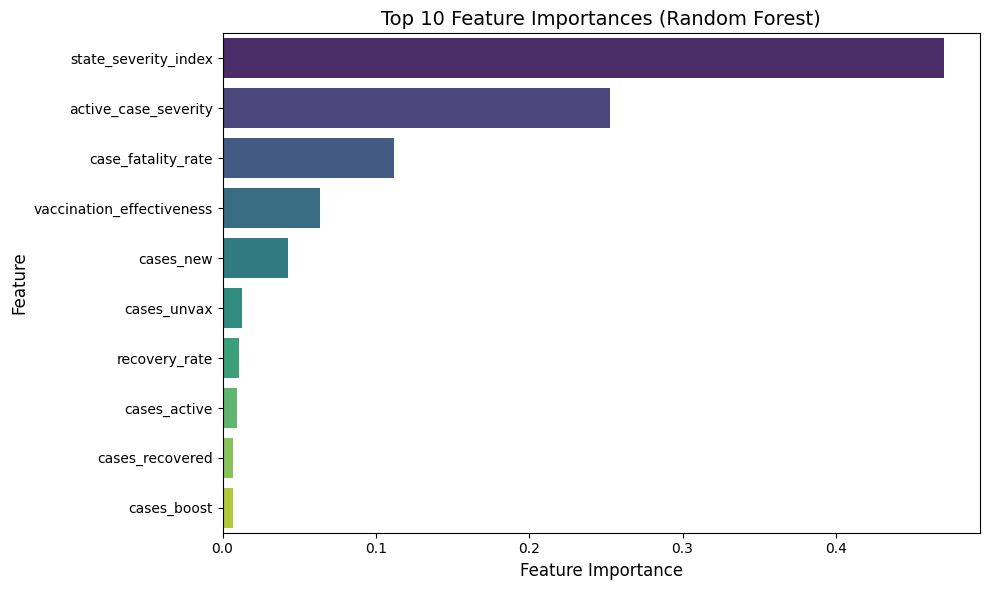

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the top 10 features
def plot_top_features(feature_importance_df, top_n=10):
    top_features = feature_importance_df.head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_features,
        x='Importance',
        y='Feature',
        palette='viridis'
    )

    plt.title(f'Top {top_n} Feature Importances (Random Forest)', fontsize=14)
    plt.xlabel('Feature Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

# Assuming xgb_feature_importance is already defined
plot_top_features(rf_feature_importance, top_n=10)

<ipython-input-87-a4280dc9c0af>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


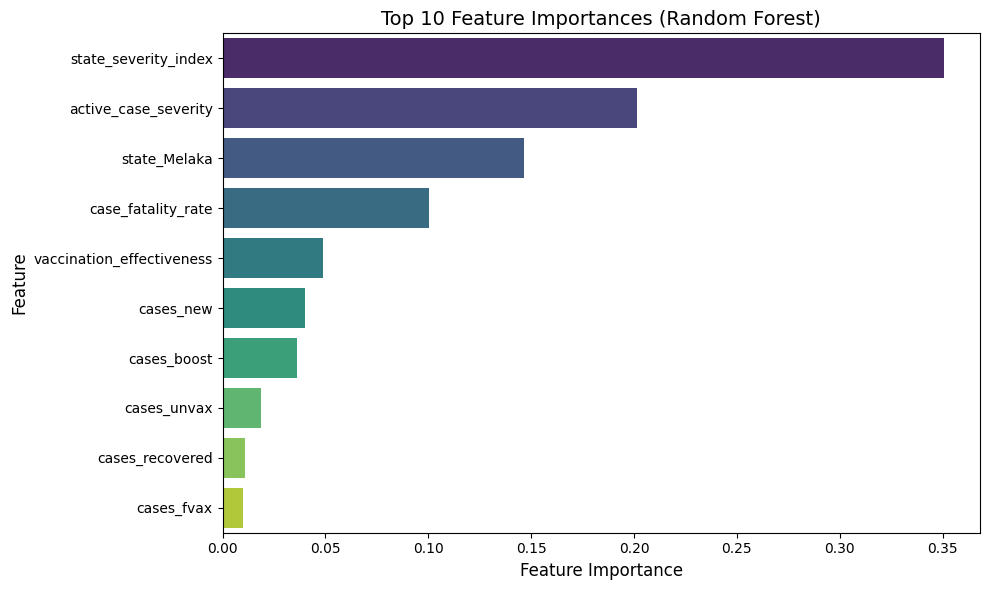

In [88]:
plot_top_features(xgb_feature_importance, top_n=10)

### <b> IV <span style='color:#85BB65'>|</span> Model Evaluation</b>

In [89]:
# Model Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate Random Forest Model
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, y_pred_rf)
print("Random Forest Model:")
print(f"MAE: {rf_mae:.4f}, RMSE: {rf_rmse:.4f}, R²: {rf_r2:.4f}")

# Evaluate XGBoost Model
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model(y_test, y_pred_xgb)
print("\nXGBoost Model:")
print(f"MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")

Random Forest Model:
MAE: 0.1228, RMSE: 0.2455, R²: 0.9884

XGBoost Model:
MAE: 0.1288, RMSE: 0.2450, R²: 0.9884


<a id='Tuning'></a>
# <p style="background-color:#4CAF50;font-family:Arial, sans-serif;color:#FFFFFF;font-size:90%;text-align:center;border-radius:5px;padding:10px;"><b>9|</b> 🏗️ Tuning by GridsearchCV 🏗️ </p>

**Tuning Strategies**

The tuning process employed GridSearchCV with 3-fold cross-validation, evaluating 108 parameter combinations for each model, resulting in 324 total fits per model. The optimization targeted R² scores while tracking MAE and RMSE as secondary metrics.

In [90]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [ ]:
# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_tuned_model = RandomForestRegressor(random_state=42)
rf_tuned_grid = GridSearchCV(estimator=rf_tuned_model, param_grid=rf_params, cv=3, scoring='r2', verbose=2, n_jobs=-1)
rf_tuned_grid.fit(X_train, y_train)

# Best Random Forest Model
best_rf_tuned_model = rf_tuned_grid.best_estimator_
y_pred_rf_tuned_ = best_rf_tuned_model.predict(X_test)


rf_tuned_mae, rf_tuned_rmse, rf_tuned_r2 = evaluate_model(y_test,y_pred_rf_tuned_)
print("Best Random Forest Model:")
print(f"Best Parameters: {rf_tuned_grid.best_params_}")

print(f"MAE: {rf_tuned_mae:.4f}, RMSE: {rf_tuned_rmse:.4f}, R²: {rf_tuned_r2:.4f}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Define the parameter grid for GridSearchCV
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb_tuned_model = XGBRegressor(random_state=42, verbosity=0, use_label_encoder=False)

# Use GridSearchCV for hyperparameter tuning
xgb_tuned_grid = GridSearchCV(
    estimator=xgb_tuned_model,
    param_grid=xgb_params,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model with GridSearchCV
xgb_tuned_grid.fit(X_train, y_train)

# Best XGBoost Model
best_xgb_tuned_model = xgb_tuned_grid.best_estimator_
y_pred_xgb_tuned = best_xgb_tuned_model.predict(X_test)

# Evaluate XGBoost Model
xgb_tuned_mae, xgb_tuned_rmse, xgb_tuned_r2 = evaluate_model(y_test, y_pred_xgb_tuned)
print("\nBest XGBoost Model:")
print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"MAE: {xgb_tuned_mae:.4f}, RMSE: {xgb_tuned_rmse:.4f}, R²: {xgb_tuned_r2:.4f}")

**Key Findings on Hyperparameter Tuning**

1. **Random Forest demonstrated stable improvements across all metrics:**
* Consistent error reduction in both average (MAE) and extreme cases (RMSE)
* Slight improvement in explained variance (R²)
* Optimal parameters suggest moderate complexity is sufficient.



2. **XGBoost showed mixed results:**
* Significant improvement in average error (MAE)
* Substantial degradation in handling extreme cases (RMSE)
* Slight decrease in explained variance (R²)
* The shallow optimal depth (5) might indicate underfitting

The hyperparameter tuning process successfully improved model performance, with the Random Forest model emerging as the more reliable choice. Its consistent improvements across all metrics and stable behavior make it the recommended option for deployment. While XGBoost showed potential in reducing average errors, its degradation in handling extreme cases suggests the need for further optimization if it's to be considered as an alternative.
